In [24]:
import pandas as pd
import numpy as np
import textwrap
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
file_veterans = "Veterans - a year of data (June 2023).xlsx"
file_non_veterans = "Non-veterans - comparison group (June 2023).xlsx"

sheet_name = "MergedSheet"

df_veterans = pd.read_excel(file_veterans, sheet_name=sheet_name)
df_non_veterans = pd.read_excel(file_non_veterans, sheet_name=sheet_name)


In [86]:
df_veterans.shape

(29361, 65)

In [87]:
df_non_veterans.shape

(29380, 37)

In [89]:
df_veterans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29361 entries, 0 to 29360
Data columns (total 65 columns):
 #   Column                                                                    Non-Null Count  Dtype  
---  ------                                                                    --------------  -----  
 0   Session ID                                                                29361 non-null  int64  
 1   What is your current employment status?                                   29170 non-null  object 
 2   What is your occupation?                                                  29083 non-null  object 
 3   Which of the following best describes your role in your industry?         28727 non-null  object 
 4   Where are you located?                                                    29289 non-null  object 
 5   What is your date of birth?                                               25150 non-null  object 
 6   Which of the following group(s) do you fall into?             

In [22]:
df_non_veterans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29380 entries, 0 to 29379
Data columns (total 37 columns):
 #   Column                                                                    Non-Null Count  Dtype  
---  ------                                                                    --------------  -----  
 0   Session ID                                                                29380 non-null  int64  
 1   What is your current employment status?                                   29323 non-null  object 
 2   Where are you located?                                                    28968 non-null  object 
 3   What is your date of birth?                                               27316 non-null  object 
 4   Which of the following group(s) do you fall into?                         29002 non-null  object 
 5   How do you identify your gender?                                          29205 non-null  object 
 6   What is your highest level of education?                      

In [90]:
similar_columns = df_veterans.columns.intersection(df_non_veterans.columns)
similar_columns

Index(['Session ID', 'What is your current employment status?',
       'Where are you located?', 'What is your date of birth?',
       'Which of the following group(s) do you fall into? ',
       'How do you identify your gender?',
       'What is your highest level of education?',
       'What is your current marital status?',
       'How many children under 18 years old live in your household?',
       'What is your zip/postal code?',
       'What is your total annual household income',
       'Are you experiencing any of the following? (Please check all that apply)',
       'Are you currently experiencing homelessness?',
       'Appreciation of Beauty & Excellence', 'Bravery', 'Love', 'Prudence',
       'Teamwork', 'Creativity', 'Curiosity', 'Fairness', 'Forgiveness',
       'Gratitude', 'Honesty', 'Hope', 'Humor', 'Perseverance ', 'Judgment',
       'Kindness', 'Leadership', 'Love of Learning', 'Humility', 'Perspective',
       'Self-Regulation', 'Social Intelligence', 'Spiritualit

In [91]:
len(similar_columns)

37

In [92]:
pd.set_option('display.max_rows', 100)

# get the number of missing data points per column
missing_values_count = df_veterans.isnull().sum()
missing_values_count

Session ID                                                                      0
What is your current employment status?                                       191
What is your occupation?                                                      278
Which of the following best describes your role in your industry?             634
Where are you located?                                                         72
What is your date of birth?                                                  4211
Which of the following group(s) do you fall into?                             574
How do you identify your gender?                                              369
What is your highest level of education?                                      398
What is your current marital status?                                         1315
How many children under 18 years old live in your household?                 1287
What is your zip/postal code?                                                2505
What is your tot

In [93]:
df_veterans.isna().mean()

Session ID                                                                  0.000000
What is your current employment status?                                     0.006505
What is your occupation?                                                    0.009468
Which of the following best describes your role in your industry?           0.021593
Where are you located?                                                      0.002452
What is your date of birth?                                                 0.143422
Which of the following group(s) do you fall into?                           0.019550
How do you identify your gender?                                            0.012568
What is your highest level of education?                                    0.013555
What is your current marital status?                                        0.044787
How many children under 18 years old live in your household?                0.043834
What is your zip/postal code?                                    

In [67]:
df_veterans.isna().mean().mean()

0.017342209576806492

In [57]:
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'No of Missing Values', 1 : '% of Missing Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Missing Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns


In [58]:
df_veterans_missing = missing_values_table(df_veterans)
df_veterans_missing

Your selected dataframe has 65 columns.
There are 14 columns that have missing values.


No of Missing Values  \
Are you experiencing any of the following? (Ple...                 18841   
What is your date of birth?                                         4211   
What is your zip/postal code?                                       2505   
What is your total annual household income                          1988   
What is your current marital status?                                1315   
How many children under 18 years old live in yo...                  1287   
Which of the following best describes your role...                   634   
Which of the following group(s) do you fall into?                    574   
Are you currently experiencing homelessness?                         434   
What is your highest level of education?                             398   
How do you identify your gender?                                     369   
What is your occupation?                                             278   
What is your current employment status?                              191   
Where are you located?                                                72   

                                                    % of Missing Values  
Are you experiencing any of the following? (Ple...                 64.2  
What is your date of birth?                                        14.3  
What is your zip/postal code?                                       8.5  
What is your total annual household income                          6.8  
What is your current marital status?                                4.5  
How many children under 18 years old live in yo...                  4.4  
Which of the following best describes your role...                  2.2  
Which of the following group(s) do you fall into?                   2.0  
Are you currently experiencing homelessness?                        1.5  
What is your highest level of education?                            1.4  
How do you identify your gender?                                    1.3  
What is your occupation?                                            0.9  
What is your current employment status?                             0.7  
Where are you located?                                              0.2

In [59]:
df_non_veterans_missing = missing_values_table(df_non_veterans)
df_non_veterans_missing

Your selected dataframe has 37 columns.
There are 12 columns that have missing values.


No of Missing Values  \
Are you experiencing any of the following? (Ple...                 22123   
What is your zip/postal code?                                       3576   
What is your total annual household income                          3318   
What is your date of birth?                                         2064   
What is your current marital status?                                1405   
How many children under 18 years old live in yo...                  1353   
Where are you located?                                               412   
Which of the following group(s) do you fall into?                    378   
What is your highest level of education?                             292   
How do you identify your gender?                                     175   
Are you currently experiencing homelessness?                          73   
What is your current employment status?                               57   

                                                    % of Missing Values  
Are you experiencing any of the following? (Ple...                 75.3  
What is your zip/postal code?                                      12.2  
What is your total annual household income                         11.3  
What is your date of birth?                                         7.0  
What is your current marital status?                                4.8  
How many children under 18 years old live in yo...                  4.6  
Where are you located?                                              1.4  
Which of the following group(s) do you fall into?                   1.3  
What is your highest level of education?                            1.0  
How do you identify your gender?                                    0.6  
Are you currently experiencing homelessness?                        0.2  
What is your current employment status?                             0.2

<Axes: >

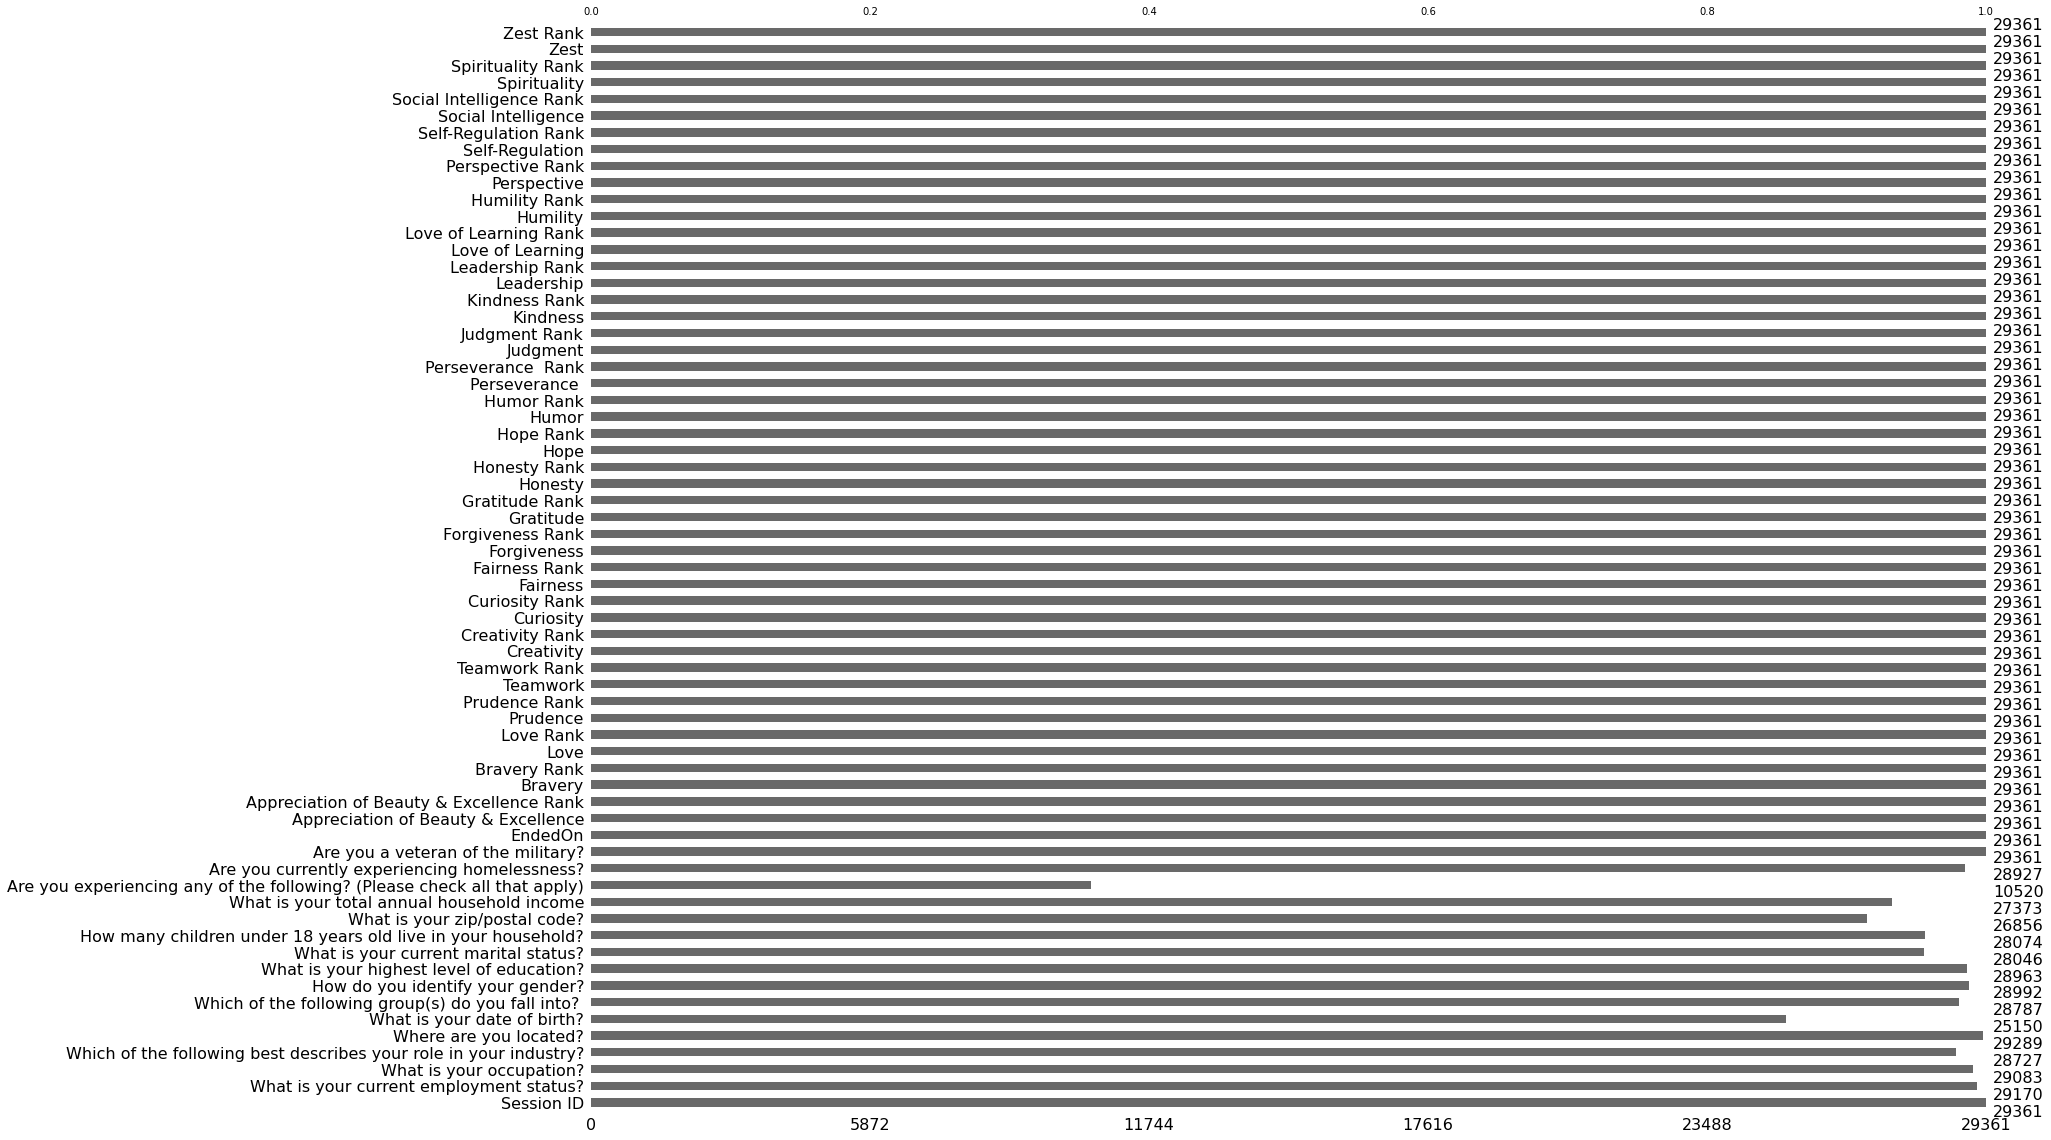

In [60]:
msno.bar(df_veterans)

<Axes: >

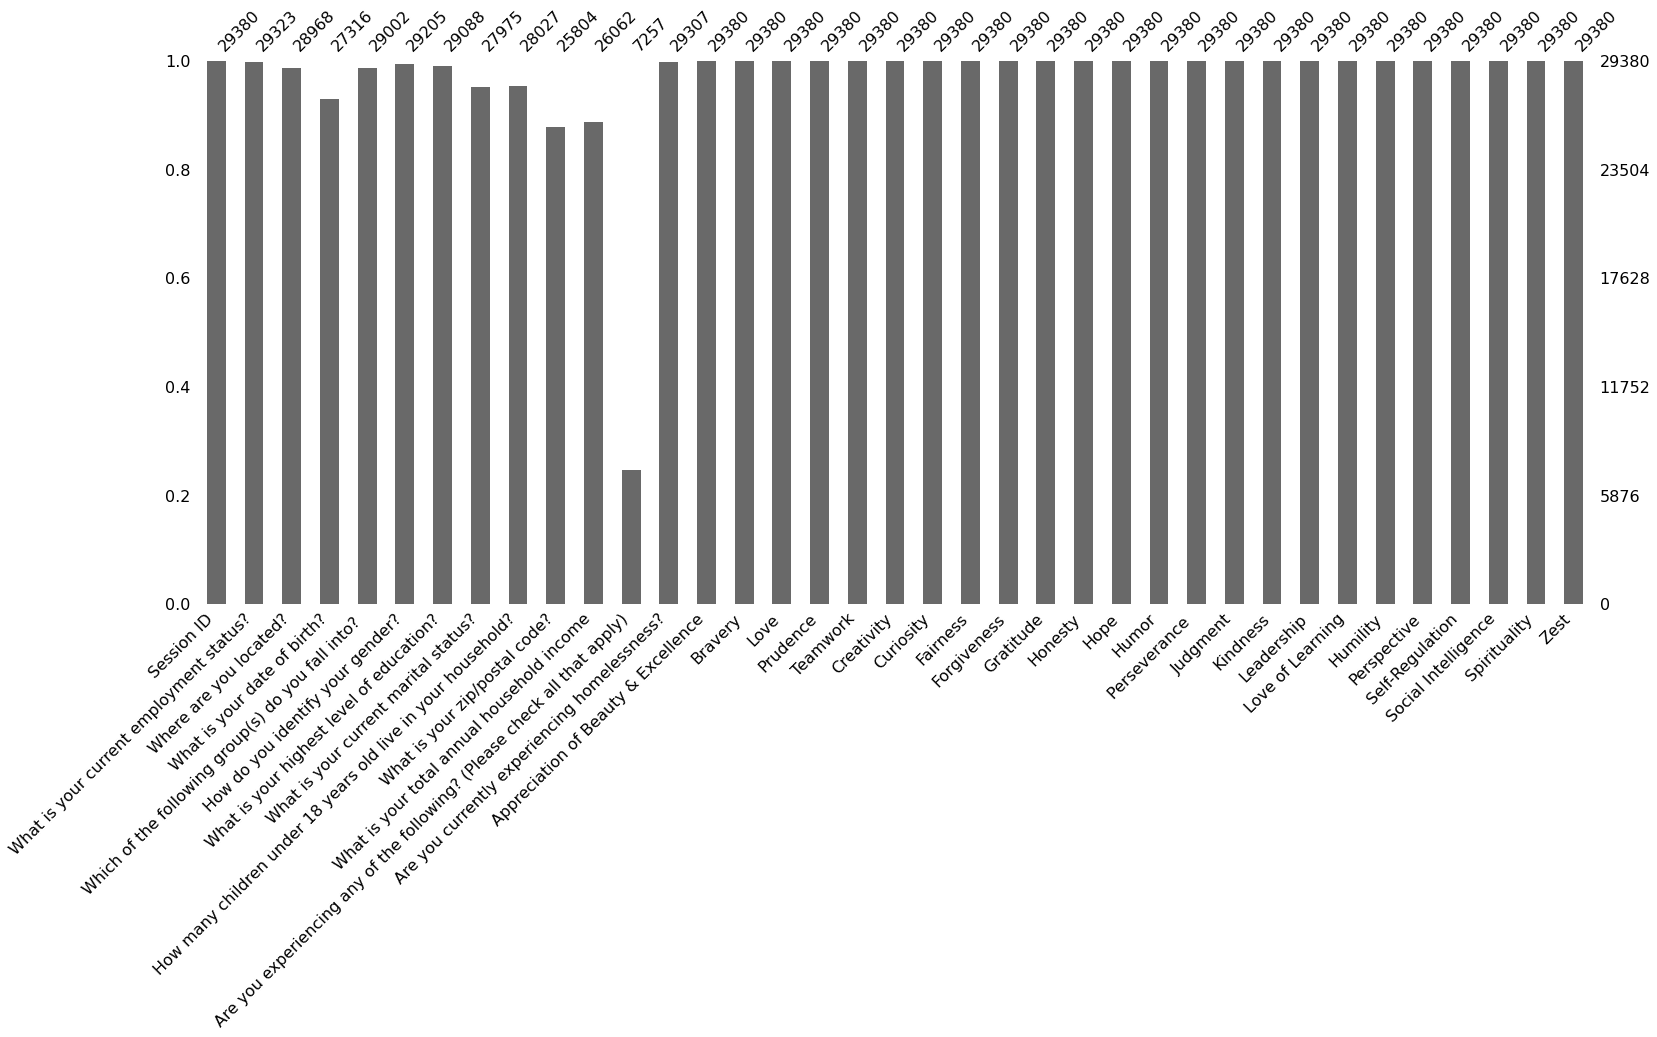

In [61]:
msno.bar(df_non_veterans)

<Axes: >

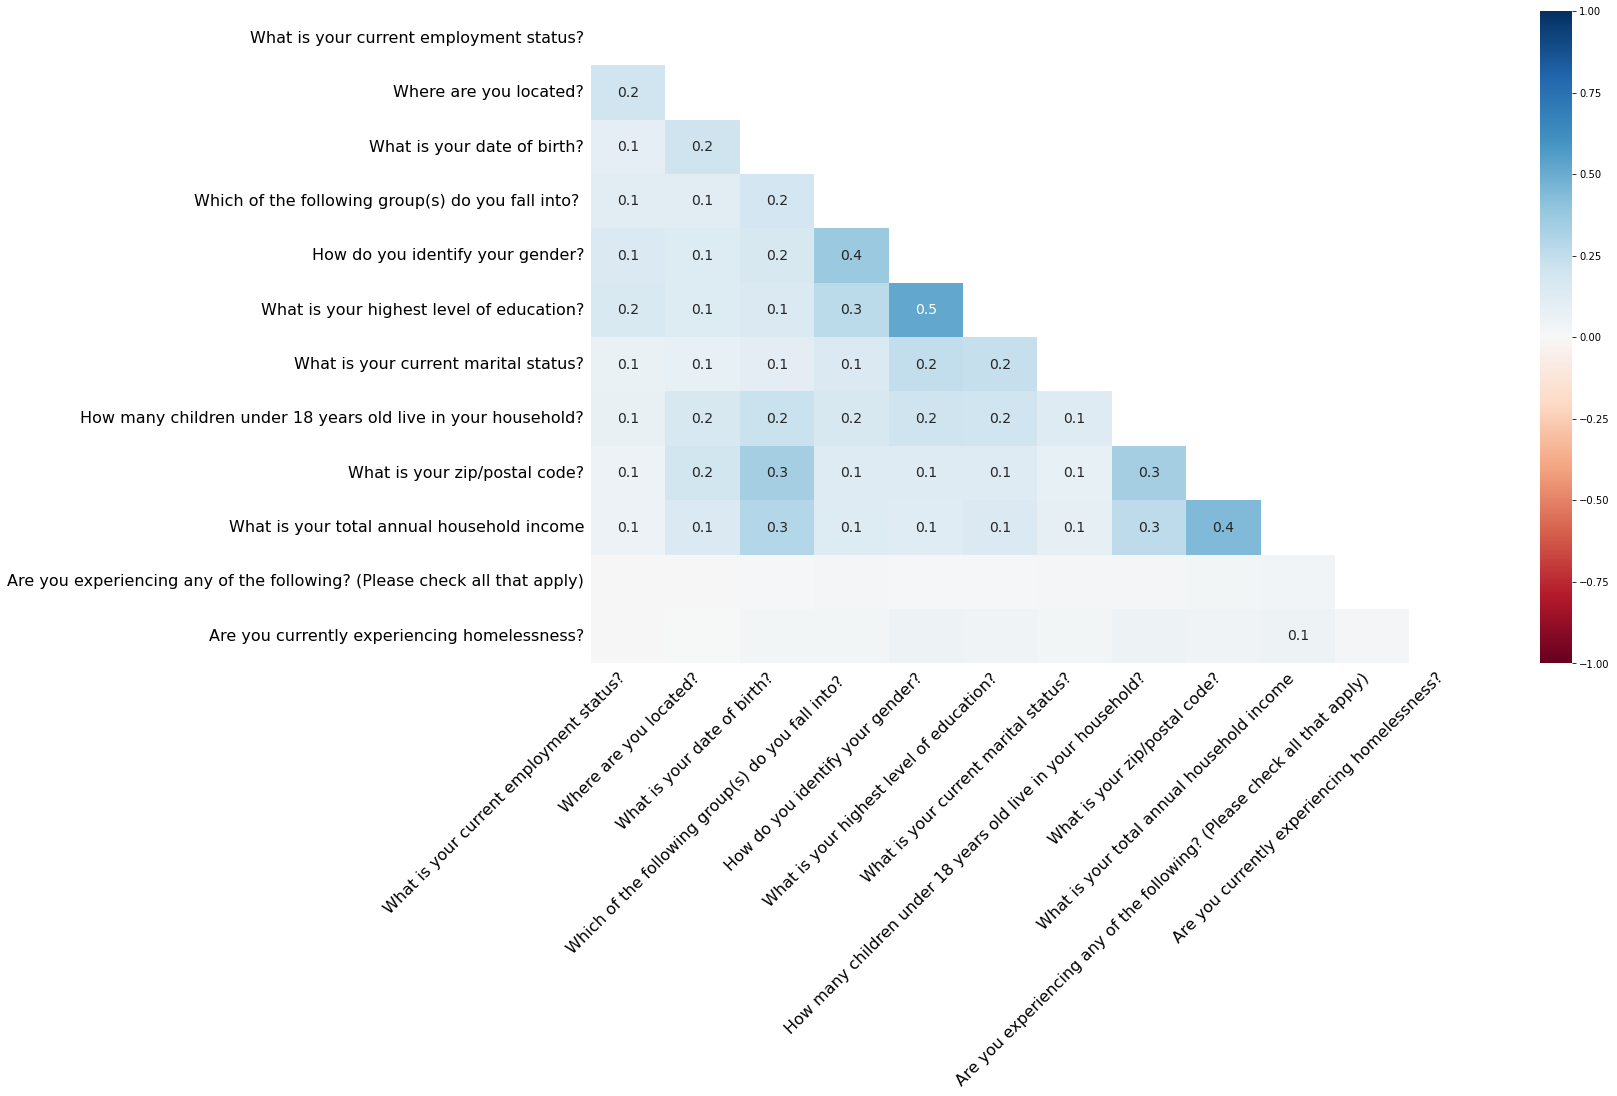

In [62]:
msno.heatmap(df_non_veterans)

<Axes: >

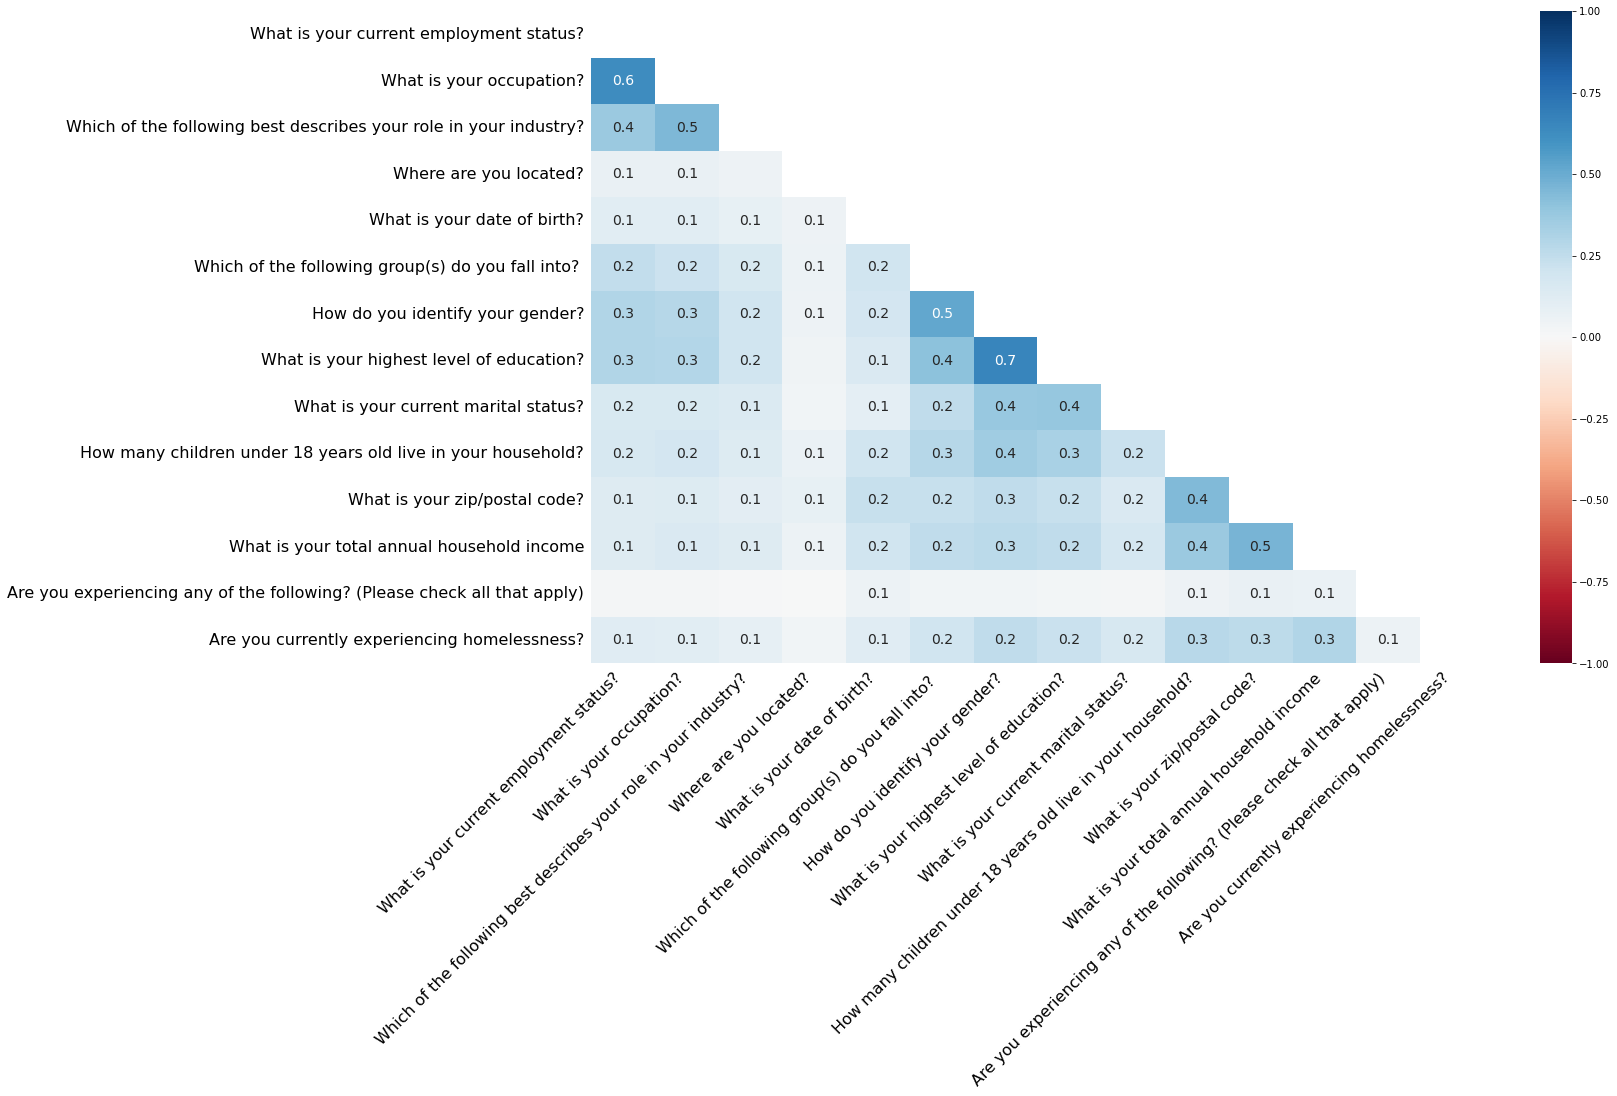

In [63]:
msno.heatmap(df_veterans)

In [75]:
list(set(df_veterans.dtypes.tolist()))

[dtype('int64'), dtype('O'), dtype('float64')]

In [76]:
df_num = df_veterans.select_dtypes(include = ['float64', 'int64'])
df_num.head()

Session ID  Appreciation of Beauty & Excellence  \
0    26026458                                 4.50   
1    25699615                                 4.75   
2    26031238                                 4.00   
3    25763902                                 4.25   
4    26629100                                 4.25   

   Appreciation of Beauty & Excellence Rank  Bravery  Bravery Rank  Love  \
0                                         6     3.25            22  4.00   
1                                         1     3.50            14  3.50   
2                                        11     3.75            16  3.25   
3                                         7     3.25            21  4.50   
4                                         9     3.75            17  4.00   

   Love Rank  Prudence  Prudence Rank  Teamwork  ...  Perspective  \
0          8      3.50             20      3.25  ...         4.00   
1          9      3.25             16      3.00  ...         3.00   
2         20      3.50             18      4.25  ...         4.25   
3          4      4.00             13      3.25  ...         4.00   
4         10      3.25             22      3.50  ...         4.25   

   Perspective Rank  Self-Regulation  Self-Regulation Rank  \
0                11             3.50                    18   
1                19             2.50                    24   
2                 6             1.75                    24   
3                12             3.50                    18   
4                 8             2.75                    24   

   Social Intelligence  Social Intelligence Rank  Spirituality  \
0                 4.00                        12          3.50   
1                 3.00                        20          2.50   
2                 3.75                        17          4.00   
3                 4.25                         8          3.25   
4                 4.50                         4          3.25   

   Spirituality Rank  Zest  Zest Rank  
0                 17  3.50         21  
1                 23  3.25         17  
2                  8  3.50         19  
3                 19  3.75         16  
4                 21  3.25         23  

[5 rows x 49 columns]

In [77]:
df_veterans_numeric = df_num.rename(columns={"Appreciation of Beauty & Excellence": "Apr_buty_exc", "Appreciation of Beauty & Excellence Rank": "Apr_buty_exc_rnk"})
df_veterans_numeric.head(5)

Session ID  Apr_buty_exc  Apr_buty_exc_rnk  Bravery  Bravery Rank  Love  \
0    26026458          4.50                 6     3.25            22  4.00   
1    25699615          4.75                 1     3.50            14  3.50   
2    26031238          4.00                11     3.75            16  3.25   
3    25763902          4.25                 7     3.25            21  4.50   
4    26629100          4.25                 9     3.75            17  4.00   

   Love Rank  Prudence  Prudence Rank  Teamwork  ...  Perspective  \
0          8      3.50             20      3.25  ...         4.00   
1          9      3.25             16      3.00  ...         3.00   
2         20      3.50             18      4.25  ...         4.25   
3          4      4.00             13      3.25  ...         4.00   
4         10      3.25             22      3.50  ...         4.25   

   Perspective Rank  Self-Regulation  Self-Regulation Rank  \
0                11             3.50                    18   
1                19             2.50                    24   
2                 6             1.75                    24   
3                12             3.50                    18   
4                 8             2.75                    24   

   Social Intelligence  Social Intelligence Rank  Spirituality  \
0                 4.00                        12          3.50   
1                 3.00                        20          2.50   
2                 3.75                        17          4.00   
3                 4.25                         8          3.25   
4                 4.50                         4          3.25   

   Spirituality Rank  Zest  Zest Rank  
0                 17  3.50         21  
1                 23  3.25         17  
2                  8  3.50         19  
3                 19  3.75         16  
4                 21  3.25         23  

[5 rows x 49 columns]

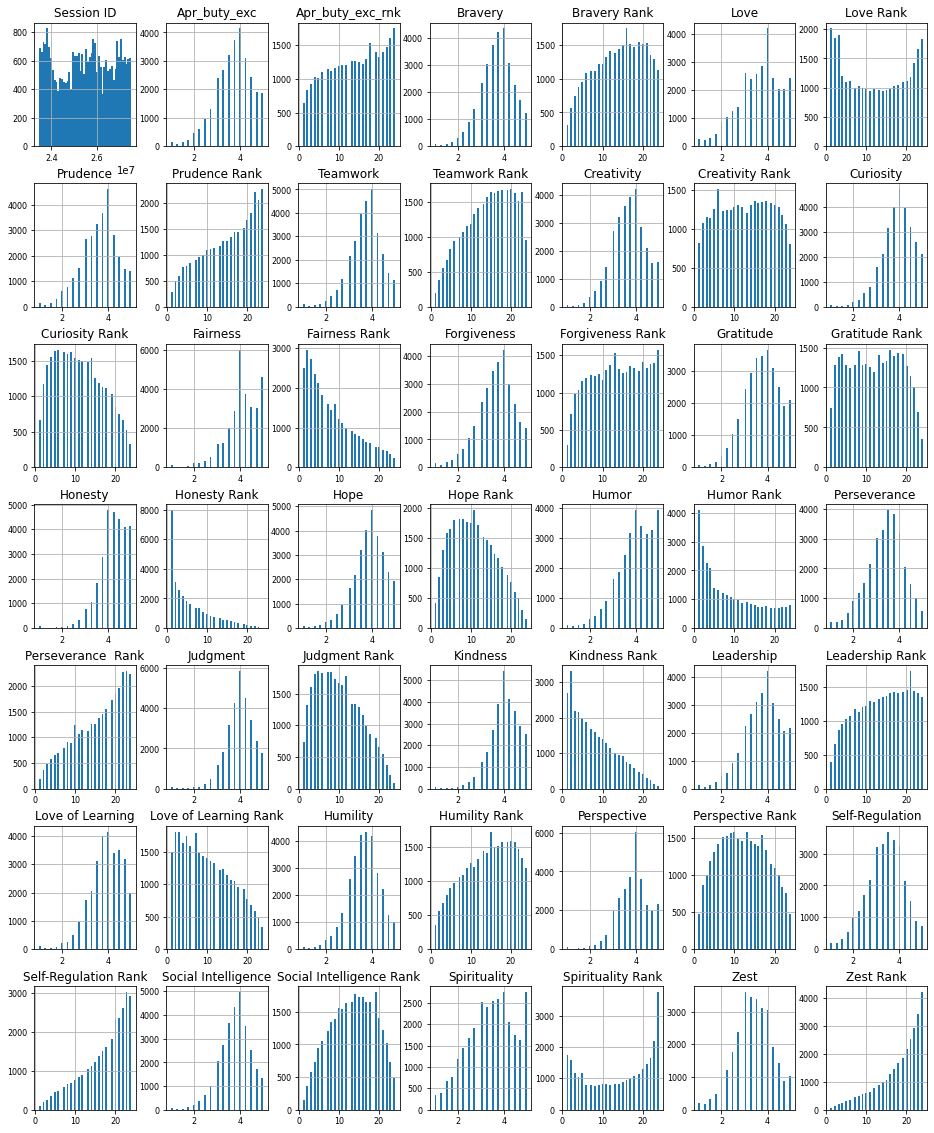

In [78]:
df_veterans_numeric.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

In [8]:
list(set(df_non_veterans.dtypes.tolist()))

[dtype('float64'), dtype('int64'), dtype('O')]

In [80]:
df_num = df_non_veterans.select_dtypes(include = ['float64', 'int64'])
df_num.head()

Session ID  Appreciation of Beauty & Excellence  Bravery  Love  Prudence  \
0    26636100                                 3.75     2.25  2.00      4.75   
1    25082543                                 4.25     3.00  2.75      4.25   
2    24383789                                 3.75     3.25  3.00      4.25   
3    26510492                                 4.75     4.75  5.00      3.25   
4    23533250                                 4.00     4.75  5.00      2.75   

   Teamwork  Creativity  Curiosity  Fairness  Forgiveness  ...  Judgment  \
0      2.50        3.00       5.00       3.5         2.75  ...      4.75   
1      3.25        3.25       3.50       5.0         4.75  ...      4.00   
2      3.75        2.50       3.25       4.0         3.00  ...      4.75   
3      4.75        5.00       4.75       5.0         3.50  ...      4.00   
4      4.00        3.50       3.75       4.0         3.00  ...      4.00   

   Kindness  Leadership  Love of Learning  Humility  Perspective  \
0      2.25        3.75              4.75      4.00         4.25   
1      4.25        3.50              3.00      4.50         4.25   
2      3.25        2.50              3.75      4.50         3.75   
3      5.00        5.00              5.00      3.75         4.75   
4      4.50        4.50              4.25      2.75         3.75   

   Self-Regulation  Social Intelligence  Spirituality  Zest  
0             3.00                 2.50           2.0  3.75  
1             4.25                 4.75           3.0  4.00  
2             3.75                 3.25           3.0  2.50  
3             2.50                 4.75           4.0  4.75  
4             3.25                 4.25           4.5  4.00  

[5 rows x 25 columns]

In [81]:
df_non_veterans_numeric = df_num.rename(columns={"Appreciation of Beauty & Excellence": "Apr_buty_exc"})
df_non_veterans_numeric.head(5)

Session ID  Apr_buty_exc  Bravery  Love  Prudence  Teamwork  Creativity  \
0    26636100          3.75     2.25  2.00      4.75      2.50        3.00   
1    25082543          4.25     3.00  2.75      4.25      3.25        3.25   
2    24383789          3.75     3.25  3.00      4.25      3.75        2.50   
3    26510492          4.75     4.75  5.00      3.25      4.75        5.00   
4    23533250          4.00     4.75  5.00      2.75      4.00        3.50   

   Curiosity  Fairness  Forgiveness  ...  Judgment  Kindness  Leadership  \
0       5.00       3.5         2.75  ...      4.75      2.25        3.75   
1       3.50       5.0         4.75  ...      4.00      4.25        3.50   
2       3.25       4.0         3.00  ...      4.75      3.25        2.50   
3       4.75       5.0         3.50  ...      4.00      5.00        5.00   
4       3.75       4.0         3.00  ...      4.00      4.50        4.50   

   Love of Learning  Humility  Perspective  Self-Regulation  \
0              4.75      4.00         4.25             3.00   
1              3.00      4.50         4.25             4.25   
2              3.75      4.50         3.75             3.75   
3              5.00      3.75         4.75             2.50   
4              4.25      2.75         3.75             3.25   

   Social Intelligence  Spirituality  Zest  
0                 2.50           2.0  3.75  
1                 4.75           3.0  4.00  
2                 3.25           3.0  2.50  
3                 4.75           4.0  4.75  
4                 4.25           4.5  4.00  

[5 rows x 25 columns]

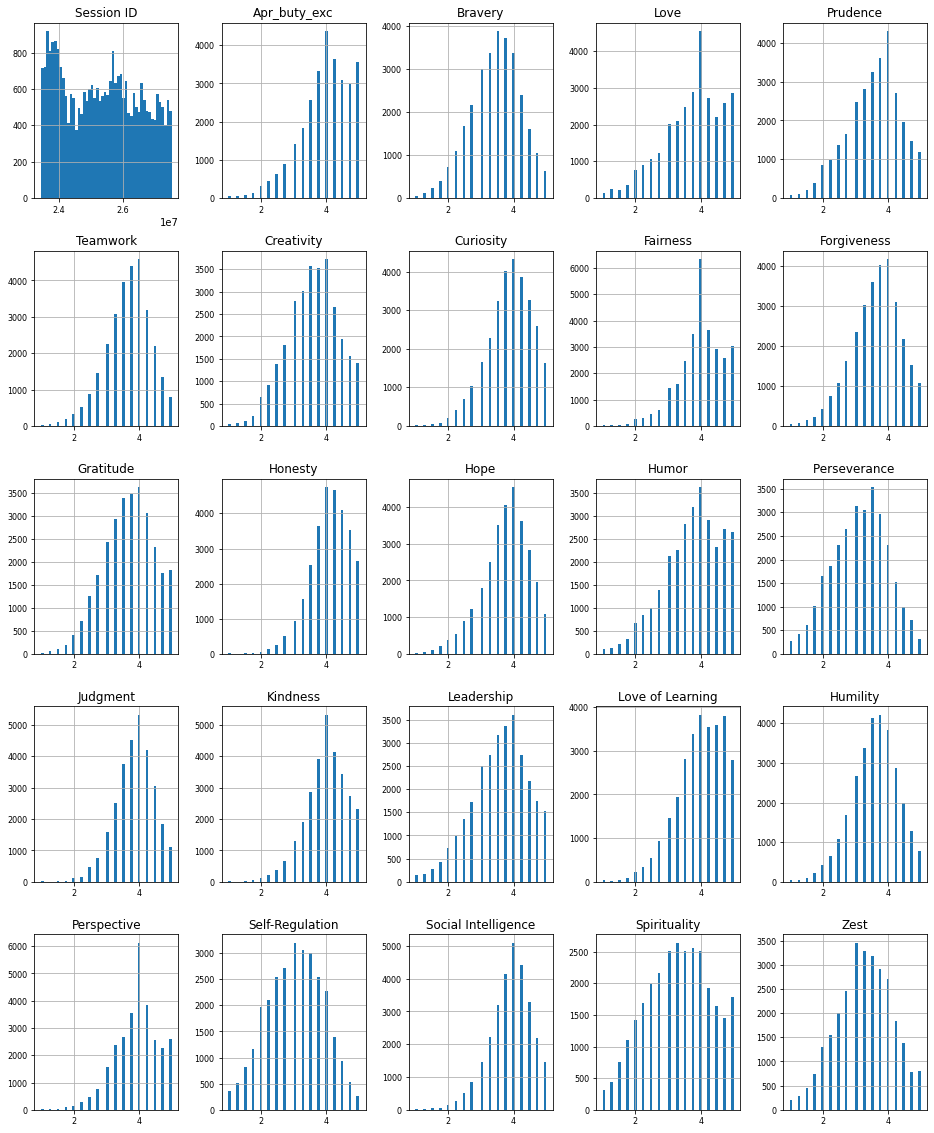

In [82]:
df_non_veterans_numeric.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

In [33]:
# Get list of categorical variables
s = (df_non_veterans.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables:")
print(object_cols)

Categorical variables:
['What is your current employment status?', 'Where are you located?', 'What is your date of birth?', 'Which of the following group(s) do you fall into? ', 'How do you identify your gender?', 'What is your highest level of education?', 'What is your current marital status?', 'How many children under 18 years old live in your household?', 'What is your zip/postal code?', 'What is your total annual household income', 'Are you experiencing any of the following? (Please check all that apply)', 'Are you currently experiencing homelessness?']


In [34]:
df_non_veterans_categorical = df_non_veterans.select_dtypes(include = 'object').copy()
df_non_veterans_categorical.head(2)

What is your current employment status? Where are you located?  \
0  Employed full time (40 or more hours per week)          United States   
1                                       Homemaker          United States   

  What is your date of birth?  \
0                  1977-02-11   
1                  1969-11-02   

  Which of the following group(s) do you fall into?   \
0                                               2332   
1                                               2332   

  How do you identify your gender?  \
0                             Male   
1                           Female   

            What is your highest level of education?  \
0  Completed Master's, Doctorate, or Professional...   
1                                  Bachelor's degree   

    What is your current marital status?  \
0  Married, or in a domestic partnership   
1  Married, or in a domestic partnership   

  How many children under 18 years old live in your household?  \
0                                                  1             
1                                                  0             

  What is your zip/postal code? What is your total annual household income  \
0                         83702                              Over $100,000   
1                         68046                              Over $100,000   

  Are you experiencing any of the following? (Please check all that apply)  \
0                                                NaN                         
1                                                NaN                         

  Are you currently experiencing homelessness?  
0                                           NO  
1                                           NO

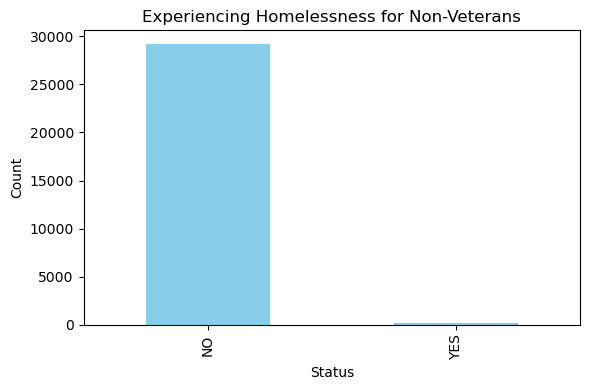

In [35]:

# Visualization
plt.figure(figsize=(6, 4))
df_non_veterans_categorical['Are you currently experiencing homelessness?'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Experiencing Homelessness for Non-Veterans')
plt.xlabel('Status')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


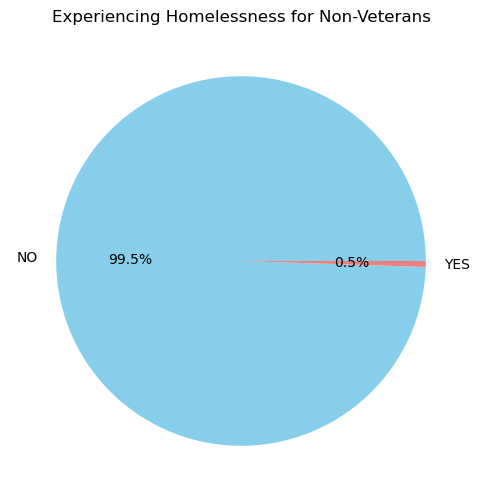

In [36]:
# Calculate the distribution
distribution = df_non_veterans_categorical['Are you currently experiencing homelessness?'].value_counts()

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(distribution, labels=distribution.index, autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title('Experiencing Homelessness for Non-Veterans')

plt.show()

In [37]:
df_veterans_categorical = df_veterans.select_dtypes(include = 'object').copy()
df_veterans_categorical.head(2)

What is your current employment status?  \
0  Employed part time (up to 39 hours per week)   
1                                       Retired   

                    What is your occupation?  \
0  Social Work and Counselling Professionals   
1                                    Retired   

  Which of the following best describes your role in your industry?  \
0                              Self-employed/Partner                  
1                                            Retired                  

  Where are you located? What is your date of birth?  \
0          United States                  1955-09-24   
1          United States                  1957-10-30   

  Which of the following group(s) do you fall into?   \
0                                               2332   
1                                               2332   

  How do you identify your gender?  \
0                           Female   
1                           Female   

            What is your highest level of education?  \
0  Completed Master's, Doctorate, or Professional...   
1                                  Bachelor's degree   

    What is your current marital status?  \
0                                    NaN   
1  Married, or in a domestic partnership   

  How many children under 18 years old live in your household?  \
0                                                  0             
1                                                  0             

  What is your zip/postal code? What is your total annual household income  \
0                         98346                         $50,000 to $74,999   
1                         34744                         $50,000 to $74,999   

  Are you experiencing any of the following? (Please check all that apply)  \
0                                                NaN                         
1                                                NaN                         

  Are you currently experiencing homelessness?  \
0                                           NO   
1                                           NO   

  Are you a veteran of the military?    EndedOn  
0                                YES  1/31/2023  
1                                YES   1/1/2023

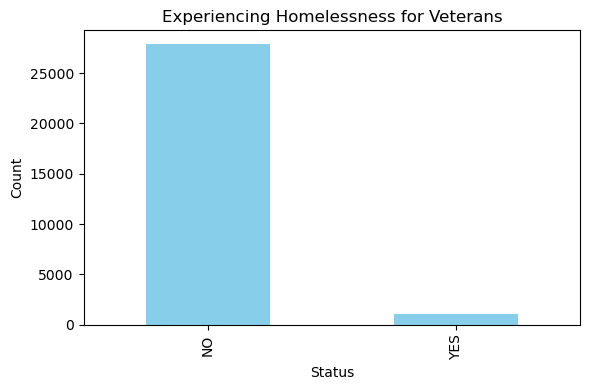

In [38]:
# Visualization
plt.figure(figsize=(6, 4))
df_veterans_categorical['Are you currently experiencing homelessness?'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Experiencing Homelessness for Veterans')
plt.xlabel('Status')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


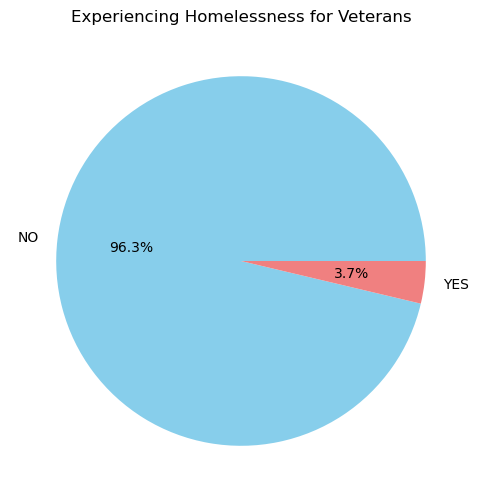

In [40]:
# Calculate the distribution
distribution = df_veterans_categorical['Are you currently experiencing homelessness?'].value_counts()

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(distribution, labels=distribution.index, autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title('Experiencing Homelessness for Veterans')

plt.show()

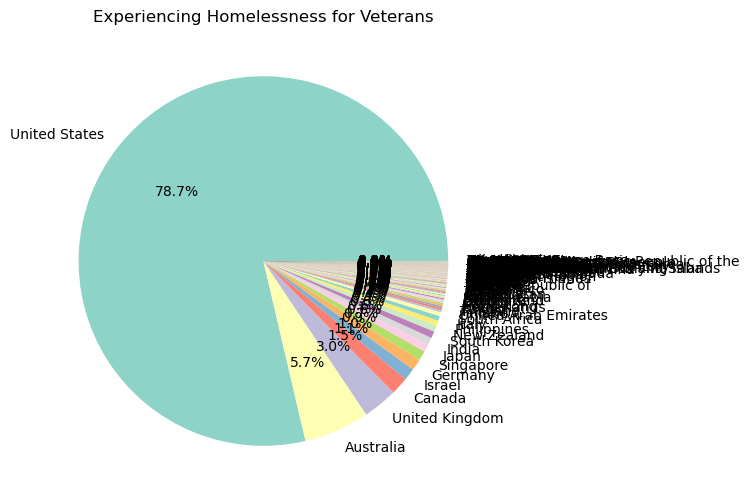

In [43]:
# Calculate the distribution
distribution = df_veterans_categorical['Where are you located?'].value_counts()

# Create a color palette based on the number of categories
num_categories = len(distribution)
color_palette = sns.color_palette("Set3", num_categories)

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(distribution, labels=distribution.index, autopct='%1.1f%%', colors=color_palette)
plt.title('Experiencing Homelessness for Veterans')

plt.show()

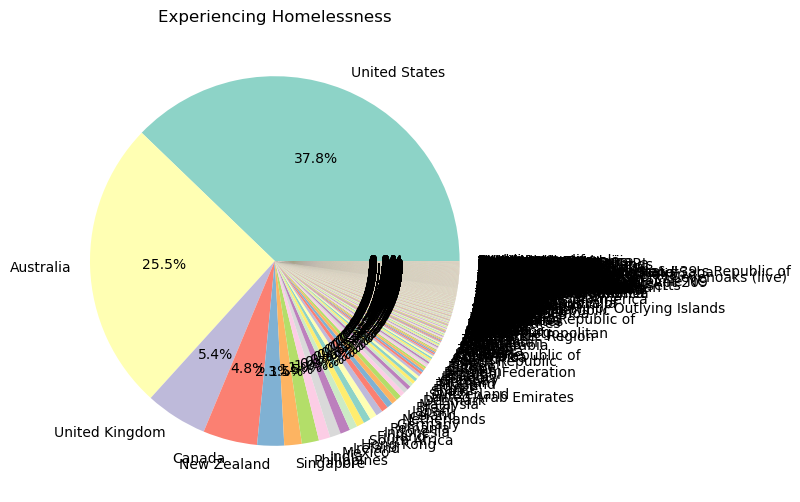

In [44]:
# Calculate the distribution
distribution = df_non_veterans_categorical['Where are you located?'].value_counts()

# Create a color palette based on the number of categories
num_categories = len(distribution)
color_palette = sns.color_palette("Set3", num_categories)

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(distribution, labels=distribution.index, autopct='%1.1f%%', colors=color_palette)
plt.title('Experiencing Homelessness')

plt.show()

<Axes: xlabel='What is your total annual household income', ylabel='count'>

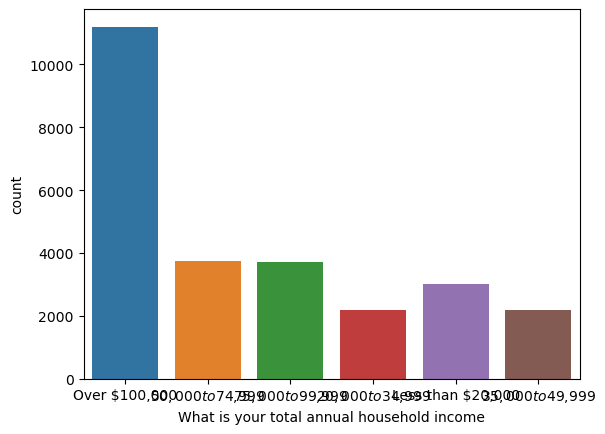

In [46]:
sns.countplot(data = df_non_veterans_categorical, x = 'What is your total annual household income')

In [54]:
# 2. Frequency Counts:
# Generate frequency counts for each categorical column
categorical_columns = df_non_veterans.select_dtypes(include=['object'])
for column in categorical_columns:
    frequency_counts = df_non_veterans[column].value_counts()
    print(f"Frequency counts for {column}:\n{frequency_counts}\n")


Frequency counts for What is your current employment status?:
What is your current employment status?
Employed full time (40 or more hours per week)    16774
Full-time Student                                  3954
Employed part time (up to 39 hours per week)       3801
Unemployed                                         1618
Other                                              1383
Retired                                             791
Homemaker                                           564
Active Military                                     231
Disabled or Unable to Work                          207
Name: count, dtype: int64

Frequency counts for Where are you located?:
Where are you located?
United States            10949
Australia                 7383
United Kingdom            1574
Canada                    1377
New Zealand                680
                         ...  
jakarta, Indonesia           1
NY                           1
San diego, california        1
Doylestown          

Text(0.5, 1.0, 'Distribution of Homelessness Status')

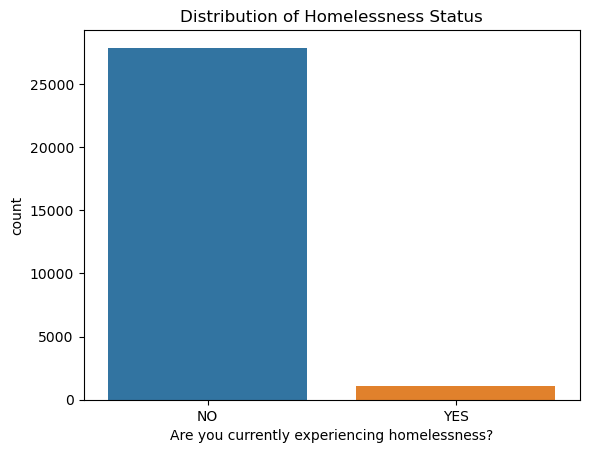

In [56]:
# Countplot for "Are you currently experiencing homelessness?"
sns.countplot(data=df_veterans, x="Are you currently experiencing homelessness?")
plt.title("Distribution of Homelessness Status")


In [60]:
# 4. Cross-Tabulations:
# Generate cross-tabulations to explore relationships between categorical variables
cross_tab = pd.crosstab(df_veterans['Are you currently experiencing homelessness?'], df_veterans['What is your current employment status?'])
cross_tab


What is your current employment status?       Active Military  \
Are you currently experiencing homelessness?                    
NO                                                       5034   
YES                                                       111   

What is your current employment status?       Disabled or Unable to Work  \
Are you currently experiencing homelessness?                               
NO                                                                   296   
YES                                                                   73   

What is your current employment status?       Employed full time (40 or more hours per week)  \
Are you currently experiencing homelessness?                                                   
NO                                                                                     16567   
YES                                                                                      272   

What is your current employment status?       Employed part time (up to 39 hours per week)  \
Are you currently experiencing homelessness?                                                 
NO                                                                                    1134   
YES                                                                                     88   

What is your current employment status?       Full-time Student   Homemaker  \
Are you currently experiencing homelessness?                                  
NO                                                          2049        216   
YES                                                          223         30   

What is your current employment status?       Other  Retired  Unemployed  
Are you currently experiencing homelessness?                              
NO                                              567     1229         633  
YES                                              78       55         118

Text(0.5, 1.0, 'Cross-Tabulation: Homelessness Status vs. Employment Status')

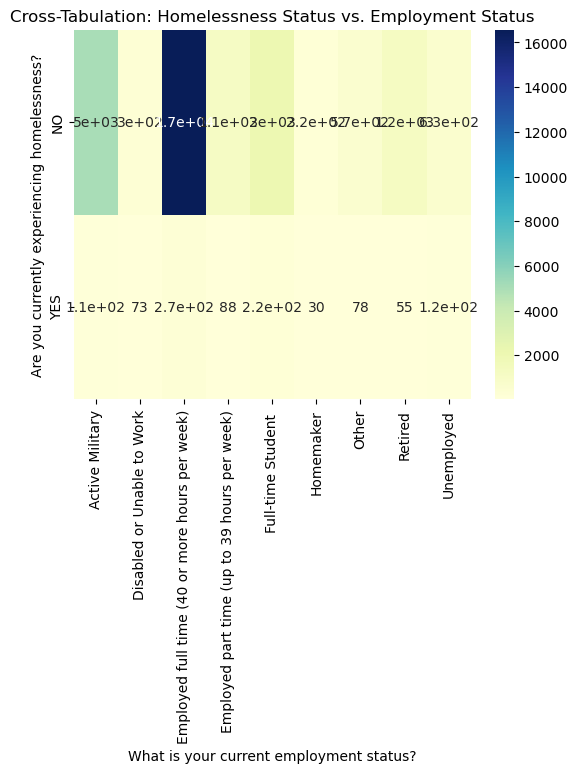

In [61]:
# You can visualize the cross-tabulation using a heatmap
sns.heatmap(cross_tab, annot=True, cmap="YlGnBu")
plt.title("Cross-Tabulation: Homelessness Status vs. Employment Status")


In [10]:
list(set(df_veterans.dtypes.tolist()))

[dtype('float64'), dtype('O'), dtype('int64')]

In [11]:
df_veterans_numeric = df_veterans.select_dtypes(include = ['float64', 'int64']).copy()
df_veterans_numeric.head(2)

Session ID  Appreciation of Beauty & Excellence  \
0    26026458                                 4.50   
1    25699615                                 4.75   

   Appreciation of Beauty & Excellence Rank  Bravery  Bravery Rank  Love  \
0                                         6     3.25            22   4.0   
1                                         1     3.50            14   3.5   

   Love Rank  Prudence  Prudence Rank  Teamwork  ...  Perspective  \
0          8      3.50             20      3.25  ...          4.0   
1          9      3.25             16      3.00  ...          3.0   

   Perspective Rank  Self-Regulation  Self-Regulation Rank  \
0                11              3.5                    18   
1                19              2.5                    24   

   Social Intelligence  Social Intelligence Rank  Spirituality  \
0                  4.0                        12           3.5   
1                  3.0                        20           2.5   

   Spirituality Rank  Zest  Zest Rank  
0                 17  3.50         21  
1                 23  3.25         17  

[2 rows x 49 columns]

In [12]:
df_veterans_numeric = df_veterans_numeric.rename(columns={"Appreciation of Beauty & Excellence": "Apr_buty_exc", "Appreciation of Beauty & Excellence Rank": "Apr_buty_exc_rnk"})
df_veterans_numeric.head(2)

Session ID  Apr_buty_exc  Apr_buty_exc_rnk  Bravery  Bravery Rank  Love  \
0    26026458          4.50                 6     3.25            22   4.0   
1    25699615          4.75                 1     3.50            14   3.5   

   Love Rank  Prudence  Prudence Rank  Teamwork  ...  Perspective  \
0          8      3.50             20      3.25  ...          4.0   
1          9      3.25             16      3.00  ...          3.0   

   Perspective Rank  Self-Regulation  Self-Regulation Rank  \
0                11              3.5                    18   
1                19              2.5                    24   

   Social Intelligence  Social Intelligence Rank  Spirituality  \
0                  4.0                        12           3.5   
1                  3.0                        20           2.5   

   Spirituality Rank  Zest  Zest Rank  
0                 17  3.50         21  
1                 23  3.25         17  

[2 rows x 49 columns]

In [13]:
df_veterans_categorical = df_veterans.select_dtypes(include = 'object').copy()
df_veterans_categorical.head(2)

What is your current employment status?  \
0  Employed part time (up to 39 hours per week)   
1                                       Retired   

                    What is your occupation?  \
0  Social Work and Counselling Professionals   
1                                    Retired   

  Which of the following best describes your role in your industry?  \
0                              Self-employed/Partner                  
1                                            Retired                  

  Where are you located? What is your date of birth?  \
0          United States                  1955-09-24   
1          United States                  1957-10-30   

  Which of the following group(s) do you fall into?   \
0                                               2332   
1                                               2332   

  How do you identify your gender?  \
0                           Female   
1                           Female   

            What is your highest level of education?  \
0  Completed Master's, Doctorate, or Professional...   
1                                  Bachelor's degree   

    What is your current marital status?  \
0                                    NaN   
1  Married, or in a domestic partnership   

  How many children under 18 years old live in your household?  \
0                                                  0             
1                                                  0             

  What is your zip/postal code? What is your total annual household income  \
0                         98346                         $50,000 to $74,999   
1                         34744                         $50,000 to $74,999   

  Are you experiencing any of the following? (Please check all that apply)  \
0                                                NaN                         
1                                                NaN                         

  Are you currently experiencing homelessness?  \
0                                           NO   
1                                           NO   

  Are you a veteran of the military?    EndedOn  
0                                YES  1/31/2023  
1                                YES   1/1/2023

In [15]:
df_veterans_categorical = df_veterans_categorical.rename(columns={"What is your current employment status?": "current_status", "Are you currently experiencing homelessness?": "experiencing_homelessness", "What is your occupation?": "occupation", "Where are you located?":"location", "How do you identify your gender?":"gender", "What is your total annual household income":"annual_income", "Are you experiencing any of the following? (Please check all that apply)":"experiencing_anything", "What is your current marital status?": "marital_status", "Are you a veteran of the military?":"military_veteran", "Which of the following best describes your role in your industry?":"industry_role", "What is your date of birth?":"data_of_birth", "What is your highest level of education?":"highest_edu", "Which of the following group(s) do you fall into?":"group", "How many children under 18 years old live in your household?":"chlid_under_18", "What is your zip/postal code?":"zip_code"})
df_veterans_categorical.head(2)

current_status  \
0  Employed part time (up to 39 hours per week)   
1                                       Retired   

                                  occupation          industry_role  \
0  Social Work and Counselling Professionals  Self-employed/Partner   
1                                    Retired                Retired   

        location data_of_birth  \
0  United States    1955-09-24   
1  United States    1957-10-30   

  Which of the following group(s) do you fall into?   gender  \
0                                               2332  Female   
1                                               2332  Female   

                                         highest_edu  \
0  Completed Master's, Doctorate, or Professional...   
1                                  Bachelor's degree   

                          marital_status chlid_under_18 zip_code  \
0                                    NaN              0    98346   
1  Married, or in a domestic partnership              0    34744   

        annual_income experiencing_anything experiencing_homelessness  \
0  $50,000 to $74,999                   NaN                        NO   
1  $50,000 to $74,999                   NaN                        NO   

  military_veteran    EndedOn  
0              YES  1/31/2023  
1              YES   1/1/2023

In [55]:
cols = ['Apr_buty_exc', 'Bravery','Love', 'Teamwork']
df_numeric = df_veterans_numeric[cols]

# Select the specific column from the categorical DataFrame
specific_categorical_column = df_veterans_categorical['experiencing_homelessness']

# Create a new DataFrame by concatenating the specific column with the numeric DataFrame
merged_df = pd.concat([df_numeric, specific_categorical_column], axis=1)
merged_df


Apr_buty_exc  Bravery  Love  Teamwork experiencing_homelessness
0              4.50     3.25  4.00      3.25                        NO
1              4.75     3.50  3.50      3.00                        NO
2              4.00     3.75  3.25      4.25                        NO
3              4.25     3.25  4.50      3.25                        NO
4              4.25     3.75  4.00      3.50                        NO
...             ...      ...   ...       ...                       ...
29356          3.50     3.25  3.75      4.00                        NO
29357          3.50     4.50  3.75      3.75                        NO
29358          2.25     3.50  2.50      3.75                        NO
29359          4.25     4.50  5.00      5.00                        NO
29360          3.25     3.50  3.50      4.00                        NO

[29361 rows x 5 columns]

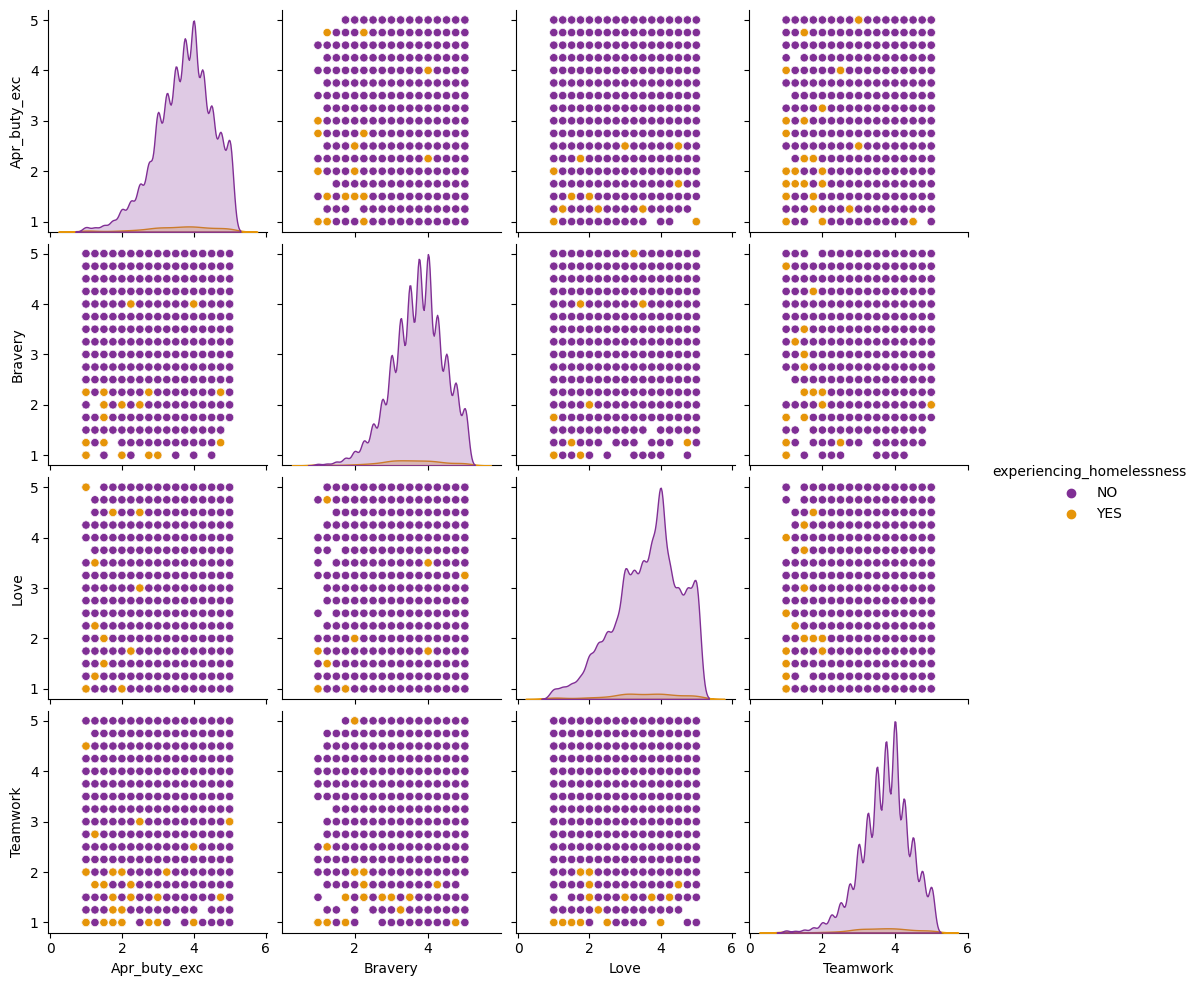

In [56]:
sns_plot = sns.pairplot(merged_df, hue='experiencing_homelessness', palette='CMRmap')
sns_plot.savefig("pairplot.png")

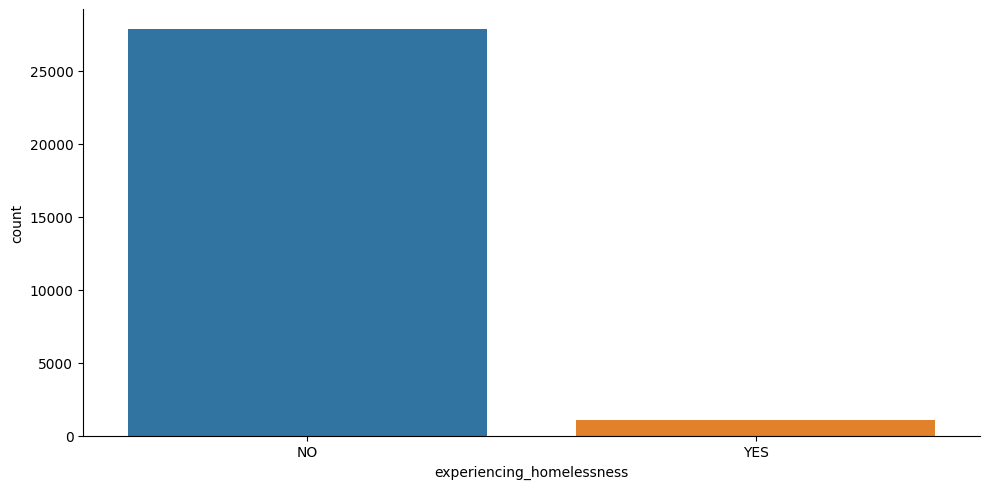

In [62]:
categorical_variable = "experiencing_homelessness"

# Create a catplot for the categorical variable
sns.catplot(x=categorical_variable, kind="count", data=df_veterans_categorical, aspect=2)

In [39]:
## Counting experiencing_homelessness classes
df_veterans_categorical.experiencing_homelessness.value_counts()

NO     27855
YES     1072
Name: experiencing_homelessness, dtype: int64

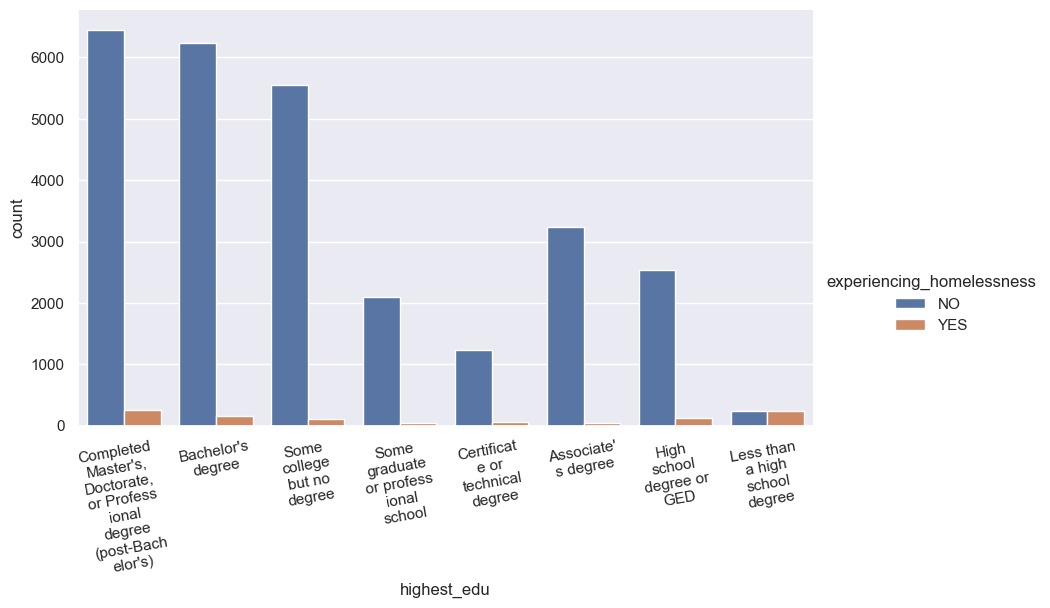

In [41]:
categorical_variable = "highest_edu" 


# Create a catplot for the categorical variable
plot = sns.catplot(x=categorical_variable, kind="count", hue="experiencing_homelessness", data=df_veterans_categorical, aspect=2)

# Wrap and rotate the x-axis tick labels
column_width = 10  
labels = [textwrap.fill(label.get_text(), width=column_width) for label in plot.ax.get_xticklabels()]
plot.set_xticklabels(labels, rotation=10) 

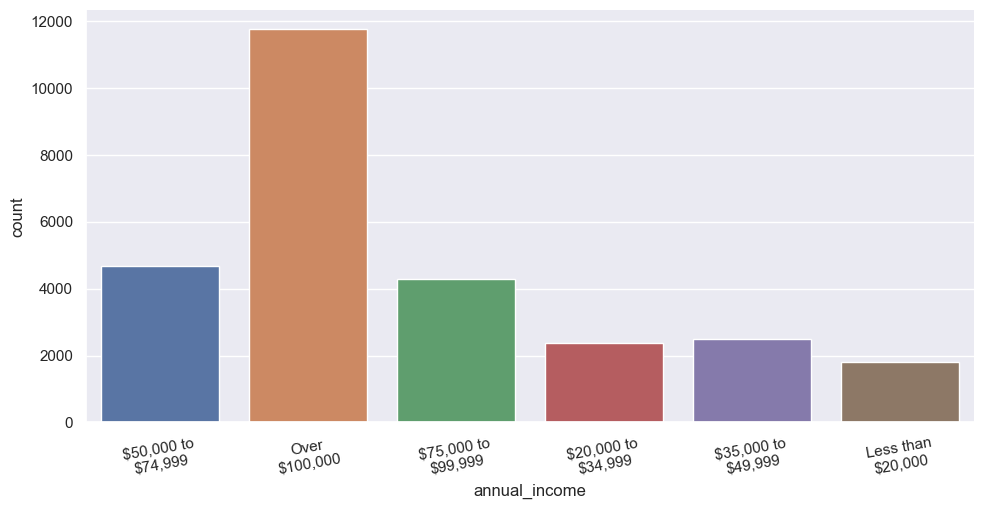

In [32]:
categorical_variable = "annual_income"


# Create a catplot for the categorical variable
plot = sns.catplot(x=categorical_variable, kind="count", data=df_veterans_categorical, aspect=2)

# Wrap and rotate the x-axis tick labels
column_width = 10  
labels = [textwrap.fill(label.get_text(), width=column_width) for label in plot.ax.get_xticklabels()]
plot.set_xticklabels(labels, rotation=10)

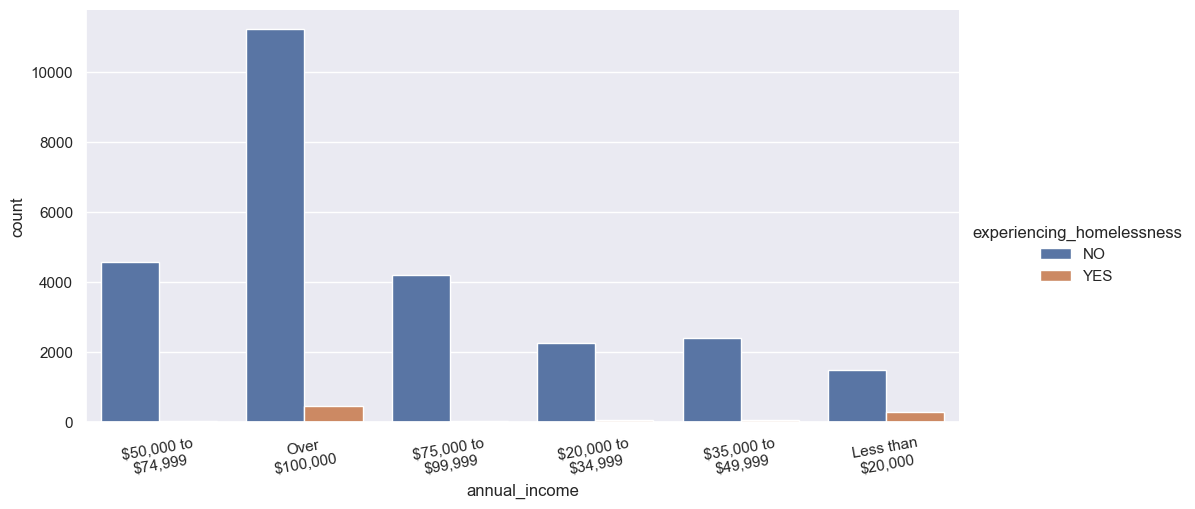

In [42]:
categorical_variable = "annual_income" 


# Create a catplot for the categorical variable
plot = sns.catplot(x=categorical_variable, kind="count", hue="experiencing_homelessness", data=df_veterans_categorical, aspect=2)

# Wrap and rotate the x-axis tick labels
column_width = 10  
labels = [textwrap.fill(label.get_text(), width=column_width) for label in plot.ax.get_xticklabels()]
plot.set_xticklabels(labels, rotation=10) 

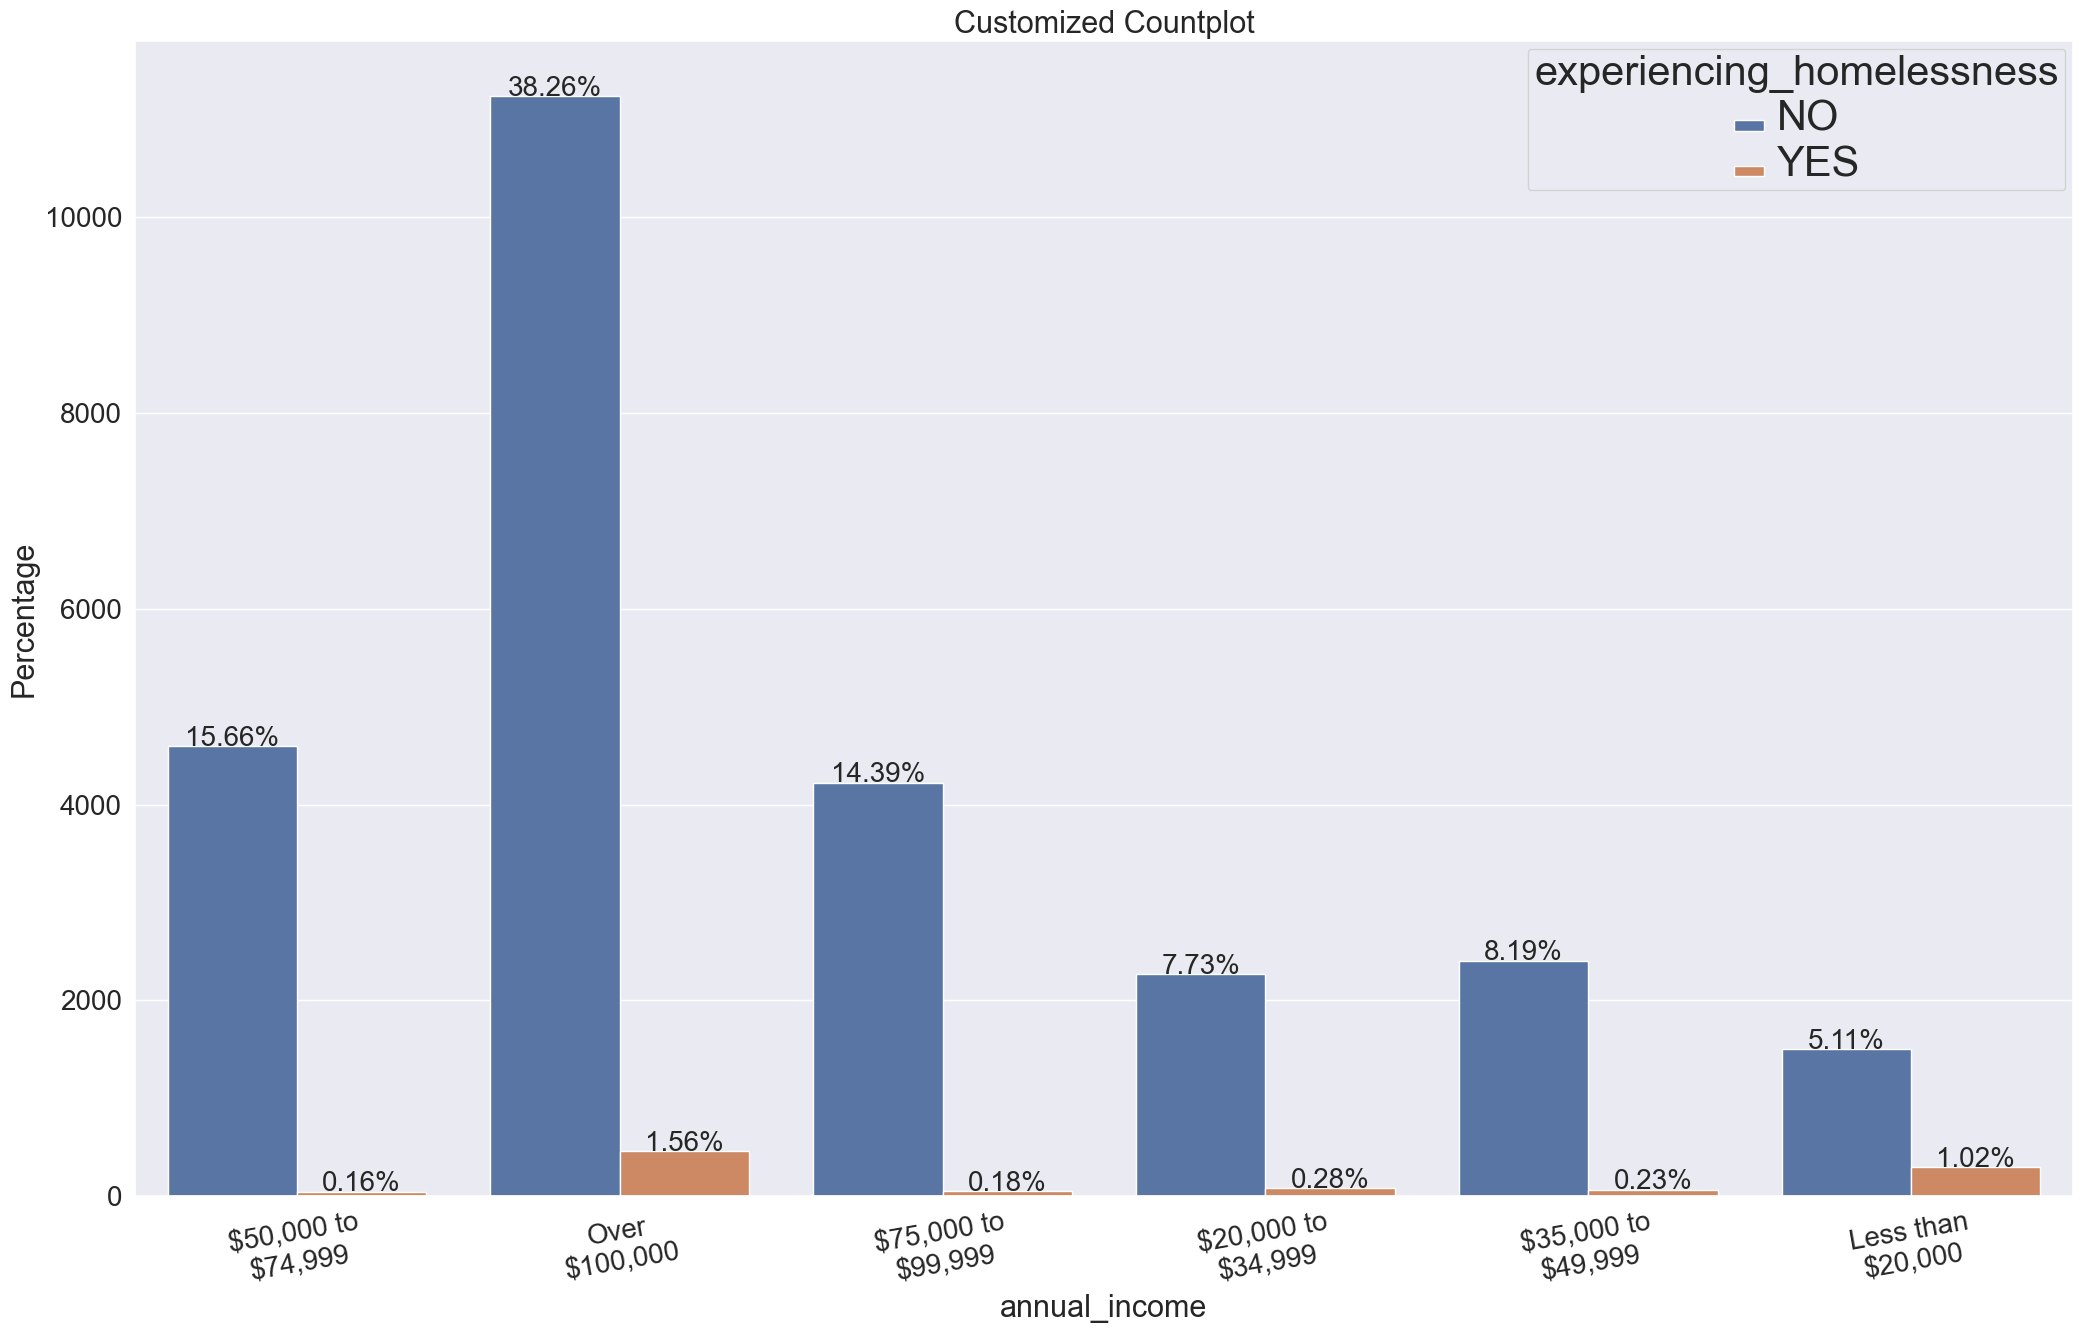

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt
import textwrap

plt.figure(figsize=(25, 15))

# Specify the categorical variables
categorical_variable = "annual_income"

# Create a countplot for the categorical variable with hue
plot = sns.countplot(x=categorical_variable, hue="experiencing_homelessness", data=df_veterans_categorical)
plot.set(xlabel=categorical_variable, ylabel="Count")

# Wrap and rotate the x-axis tick labels
column_width = 10
percentage_font_size = 20
labels = [textwrap.fill(label.get_text(), width=column_width) for label in plot.get_xticklabels()]
plot.set_xticklabels(labels, rotation=10)

# Calculate and display percentages on top of the bars
total_counts = len(df_veterans_categorical)
for p in plot.patches:
    height = p.get_height()
    plot.text(p.get_x() + p.get_width() / 2, height + 5, f'{height/total_counts:.2%}', ha="center", fontsize=percentage_font_size)

    
# Customize font size for various elements in the countplot
title_font_size = 22  # Adjust the title font size
xlabel_font_size = 22  # Adjust the x-axis label font size
ylabel_font_size = 22  # Adjust the y-axis label font size
tick_font_size = 20  # Adjust the tick label font size
legend_font_size = 30  # Adjust the font size for the legend

plot.set_title("Customized Countplot", fontsize=title_font_size)
plot.set_xlabel(categorical_variable, fontsize=xlabel_font_size)
plot.set_ylabel("Percentage", fontsize=ylabel_font_size)
plot.tick_params(axis="both", labelsize=tick_font_size)  


# Customize the font size for the legend and retain variable names in the legend
legend = plot.get_legend()
legend.set_title("experiencing_homelessness", prop={'size': legend_font_size})  # Set a title and font size for the legend
for label in legend.texts:
    label.set_fontsize(legend_font_size)
    
# Display the plot
plt.show()


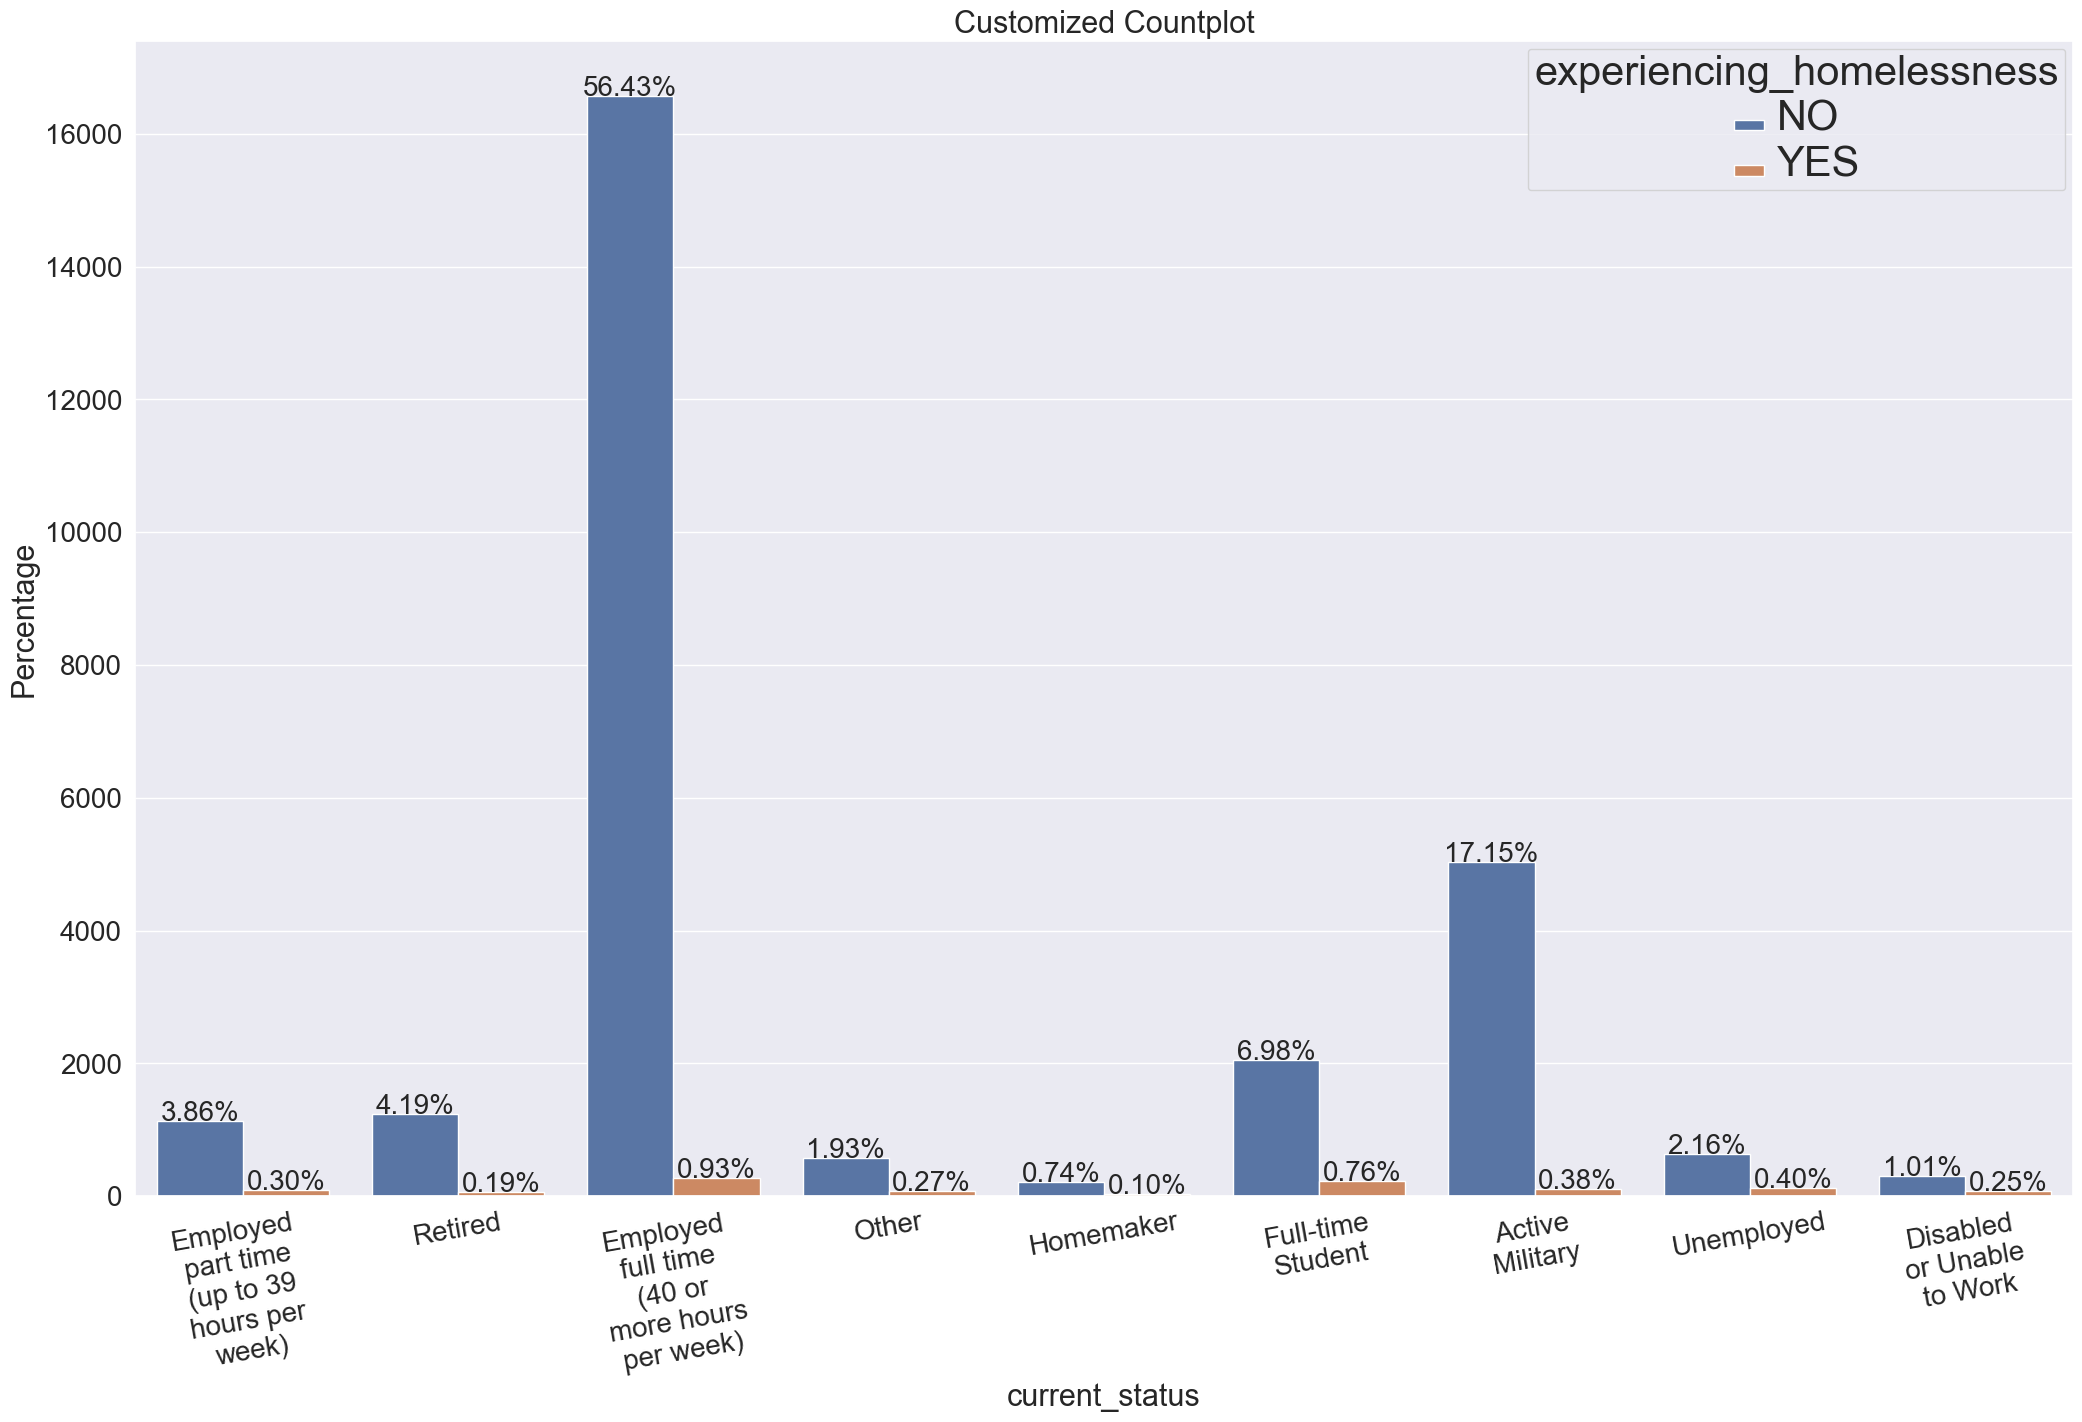

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt
import textwrap

plt.figure(figsize=(25, 15))

# Specify the categorical variables
categorical_variable = "current_status"

# Create a countplot for the categorical variable with hue
plot = sns.countplot(x=categorical_variable, hue="experiencing_homelessness", data=df_veterans_categorical)
plot.set(xlabel=categorical_variable, ylabel="Count")

# Wrap and rotate the x-axis tick labels
column_width = 10
percentage_font_size = 20
labels = [textwrap.fill(label.get_text(), width=column_width) for label in plot.get_xticklabels()]
plot.set_xticklabels(labels, rotation=10)

# Calculate and display percentages on top of the bars
total_counts = len(df_veterans_categorical)
for p in plot.patches:
    height = p.get_height()
    plot.text(p.get_x() + p.get_width() / 2, height + 5, f'{height/total_counts:.2%}', ha="center", fontsize=percentage_font_size)

    
# Customize font size for various elements in the countplot
title_font_size = 22  # Adjust the title font size
xlabel_font_size = 22  # Adjust the x-axis label font size
ylabel_font_size = 22  # Adjust the y-axis label font size
tick_font_size = 20  # Adjust the tick label font size
legend_font_size = 30  # Adjust the font size for the legend

plot.set_title("Customized Countplot", fontsize=title_font_size)
plot.set_xlabel(categorical_variable, fontsize=xlabel_font_size)
plot.set_ylabel("Percentage", fontsize=ylabel_font_size)
plot.tick_params(axis="both", labelsize=tick_font_size)  


# Customize the font size for the legend and retain variable names in the legend
legend = plot.get_legend()
legend.set_title("experiencing_homelessness", prop={'size': legend_font_size})  # Set a title and font size for the legend
for label in legend.texts:
    label.set_fontsize(legend_font_size)
    
# Display the plot
plt.show()

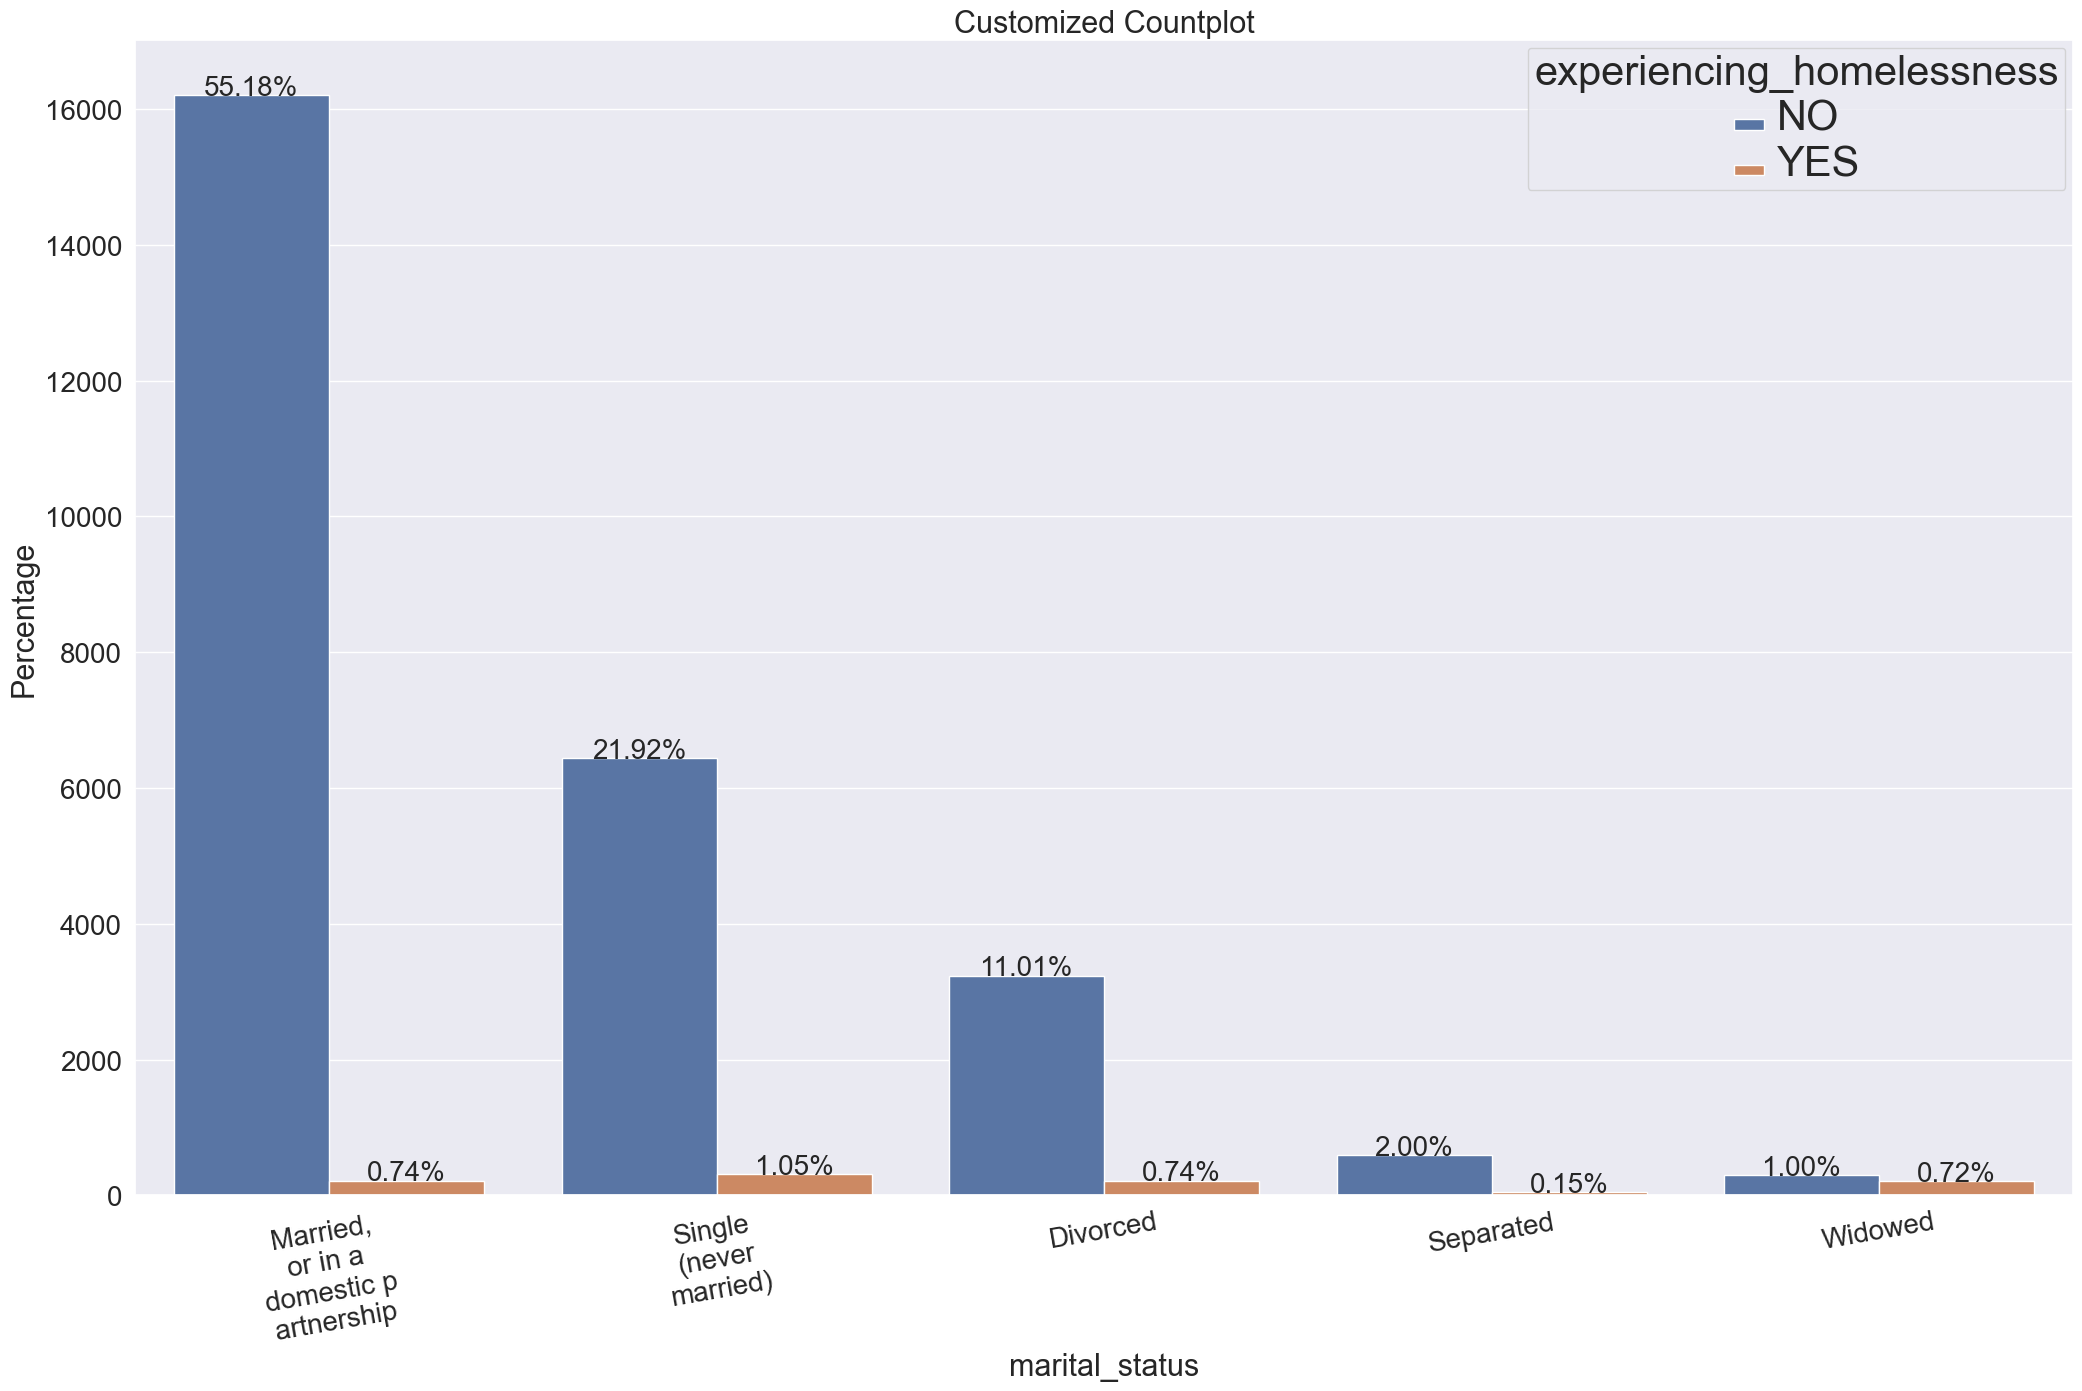

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt
import textwrap

plt.figure(figsize=(25, 15))

# Specify the categorical variables
categorical_variable = "marital_status"

# Create a countplot for the categorical variable with hue
plot = sns.countplot(x=categorical_variable, hue="experiencing_homelessness", data=df_veterans_categorical)
plot.set(xlabel=categorical_variable, ylabel="Count")

# Wrap and rotate the x-axis tick labels
column_width = 10
percentage_font_size = 20
labels = [textwrap.fill(label.get_text(), width=column_width) for label in plot.get_xticklabels()]
plot.set_xticklabels(labels, rotation=10)

# Calculate and display percentages on top of the bars
total_counts = len(df_veterans_categorical)
for p in plot.patches:
    height = p.get_height()
    plot.text(p.get_x() + p.get_width() / 2, height + 5, f'{height/total_counts:.2%}', ha="center", fontsize=percentage_font_size)

    
# Customize font size for various elements in the countplot
title_font_size = 22  # Adjust the title font size
xlabel_font_size = 22  # Adjust the x-axis label font size
ylabel_font_size = 22  # Adjust the y-axis label font size
tick_font_size = 20  # Adjust the tick label font size
legend_font_size = 30  # Adjust the font size for the legend

plot.set_title("Customized Countplot", fontsize=title_font_size)
plot.set_xlabel(categorical_variable, fontsize=xlabel_font_size)
plot.set_ylabel("Percentage", fontsize=ylabel_font_size)
plot.tick_params(axis="both", labelsize=tick_font_size)  


# Customize the font size for the legend and retain variable names in the legend
legend = plot.get_legend()
legend.set_title("experiencing_homelessness", prop={'size': legend_font_size})  # Set a title and font size for the legend
for label in legend.texts:
    label.set_fontsize(legend_font_size)
    
# Display the plot
plt.show()

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

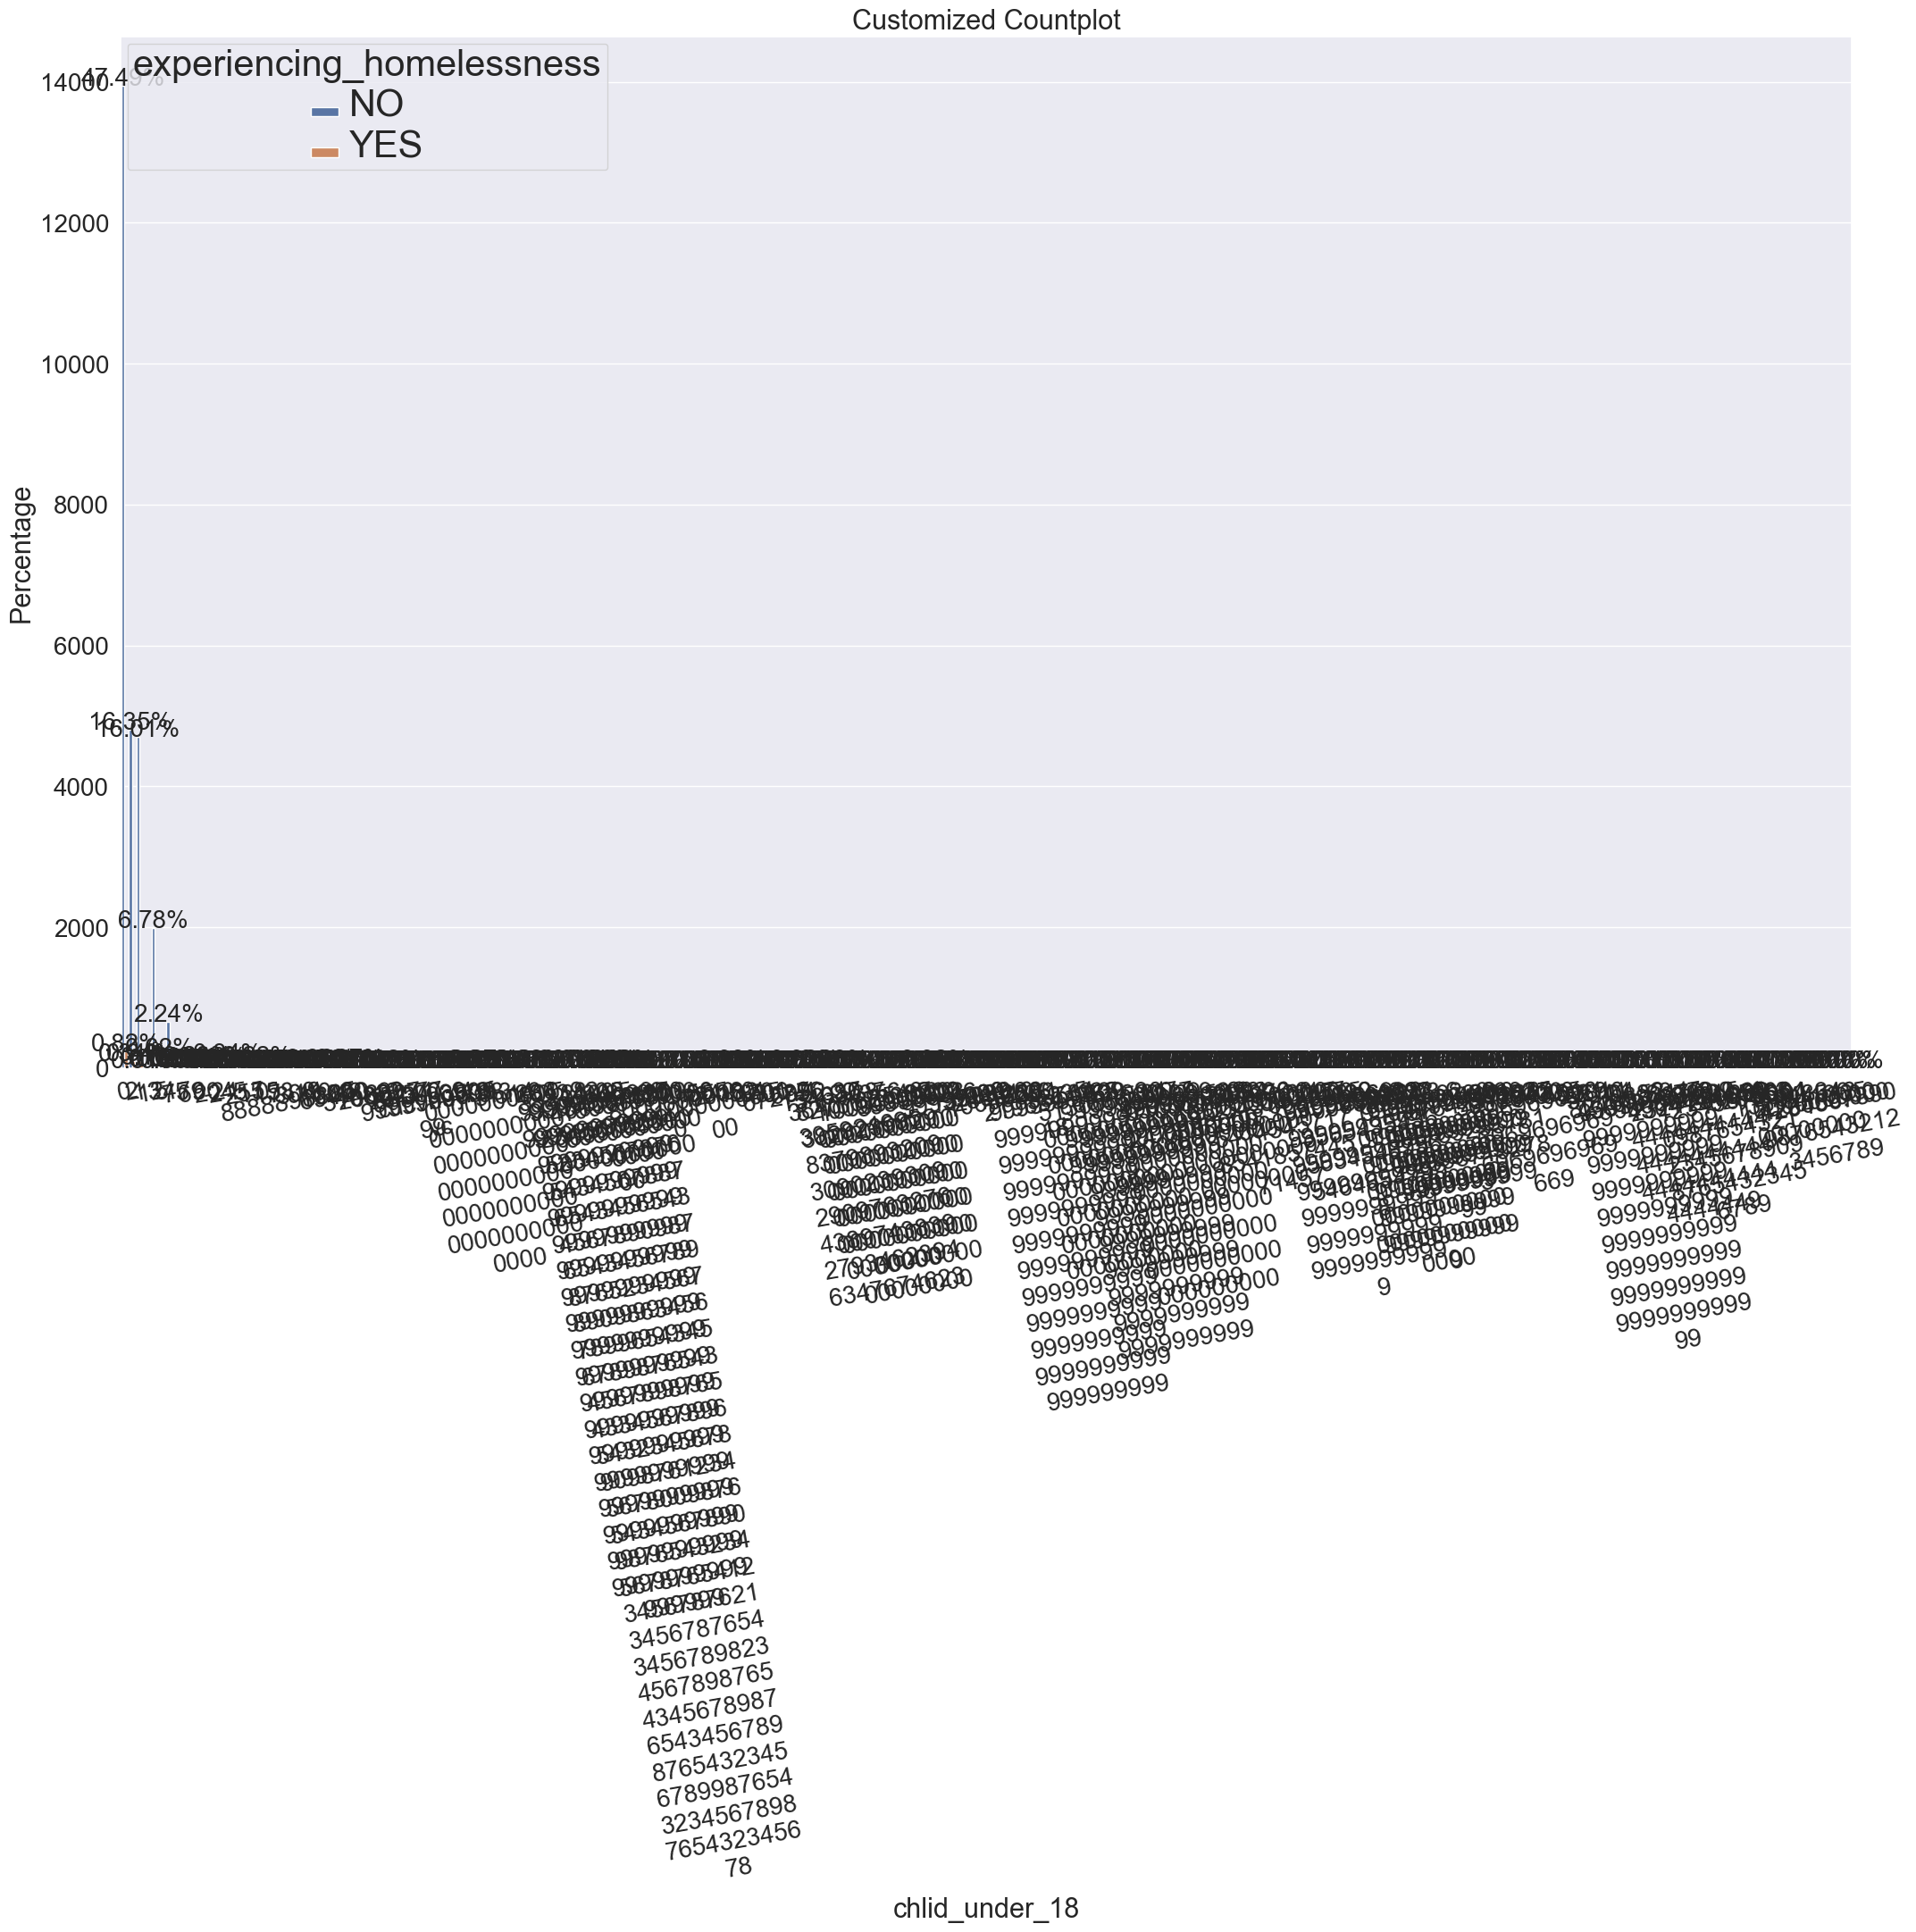

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt
import textwrap

plt.figure(figsize=(25, 15))

# Specify the categorical variables
categorical_variable = "chlid_under_18"

# Create a countplot for the categorical variable with hue
plot = sns.countplot(x=categorical_variable, hue="experiencing_homelessness", data=df_veterans_categorical)
plot.set(xlabel=categorical_variable, ylabel="Count")

# Wrap and rotate the x-axis tick labels
column_width = 10
percentage_font_size = 20
labels = [textwrap.fill(label.get_text(), width=column_width) for label in plot.get_xticklabels()]
plot.set_xticklabels(labels, rotation=10)

# Calculate and display percentages on top of the bars
total_counts = len(df_veterans_categorical)
for p in plot.patches:
    height = p.get_height()
    plot.text(p.get_x() + p.get_width() / 2, height + 5, f'{height/total_counts:.2%}', ha="center", fontsize=percentage_font_size)

    
# Customize font size for various elements in the countplot
title_font_size = 22  # Adjust the title font size
xlabel_font_size = 22  # Adjust the x-axis label font size
ylabel_font_size = 22  # Adjust the y-axis label font size
tick_font_size = 20  # Adjust the tick label font size
legend_font_size = 30  # Adjust the font size for the legend

plot.set_title("Customized Countplot", fontsize=title_font_size)
plot.set_xlabel(categorical_variable, fontsize=xlabel_font_size)
plot.set_ylabel("Percentage", fontsize=ylabel_font_size)
plot.tick_params(axis="both", labelsize=tick_font_size)  


# Customize the font size for the legend and retain variable names in the legend
legend = plot.get_legend()
legend.set_title("experiencing_homelessness", prop={'size': legend_font_size})  # Set a title and font size for the legend
for label in legend.texts:
    label.set_fontsize(legend_font_size)
    
# Display the plot
plt.show()

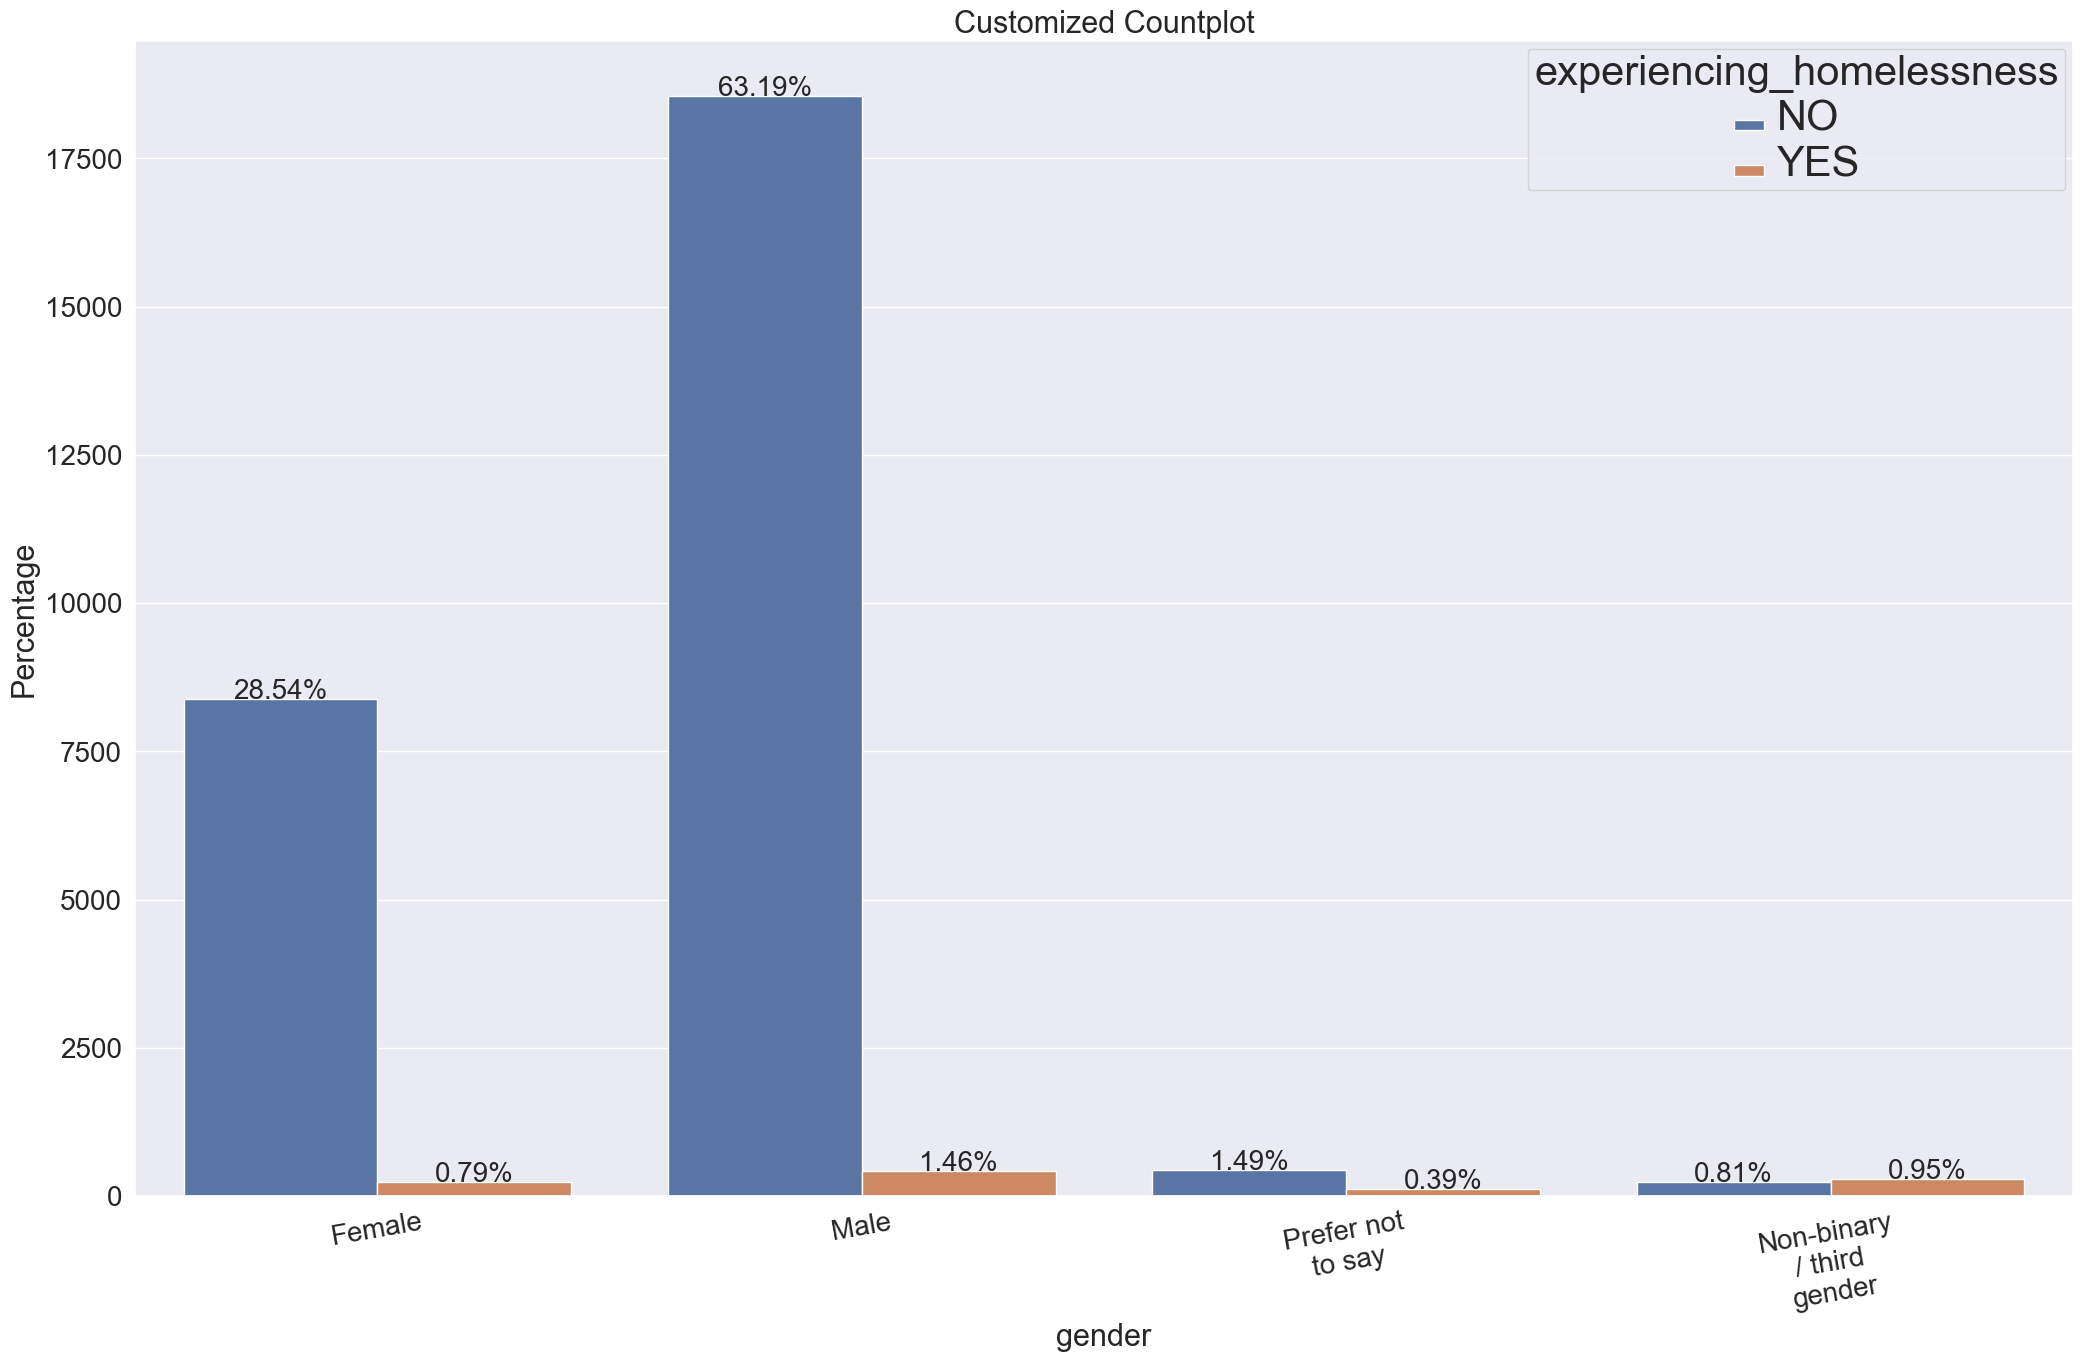

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt
import textwrap

plt.figure(figsize=(25, 15))

# Specify the categorical variables
categorical_variable = "gender"

# Create a countplot for the categorical variable with hue
plot = sns.countplot(x=categorical_variable, hue="experiencing_homelessness", data=df_veterans_categorical)
plot.set(xlabel=categorical_variable, ylabel="Count")

# Wrap and rotate the x-axis tick labels
column_width = 10
percentage_font_size = 20
labels = [textwrap.fill(label.get_text(), width=column_width) for label in plot.get_xticklabels()]
plot.set_xticklabels(labels, rotation=10)

# Calculate and display percentages on top of the bars
total_counts = len(df_veterans_categorical)
for p in plot.patches:
    height = p.get_height()
    plot.text(p.get_x() + p.get_width() / 2, height + 5, f'{height/total_counts:.2%}', ha="center", fontsize=percentage_font_size)

    
# Customize font size for various elements in the countplot
title_font_size = 22  # Adjust the title font size
xlabel_font_size = 22  # Adjust the x-axis label font size
ylabel_font_size = 22  # Adjust the y-axis label font size
tick_font_size = 20  # Adjust the tick label font size
legend_font_size = 30  # Adjust the font size for the legend

plot.set_title("Customized Countplot", fontsize=title_font_size)
plot.set_xlabel(categorical_variable, fontsize=xlabel_font_size)
plot.set_ylabel("Percentage", fontsize=ylabel_font_size)
plot.tick_params(axis="both", labelsize=tick_font_size)  


# Customize the font size for the legend and retain variable names in the legend
legend = plot.get_legend()
legend.set_title("experiencing_homelessness", prop={'size': legend_font_size})  # Set a title and font size for the legend
for label in legend.texts:
    label.set_fontsize(legend_font_size)
    
# Display the plot
plt.show()

C:\Users\Solayman\AppData\Local\Temp\ipykernel_36400\3624113856.py:10: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


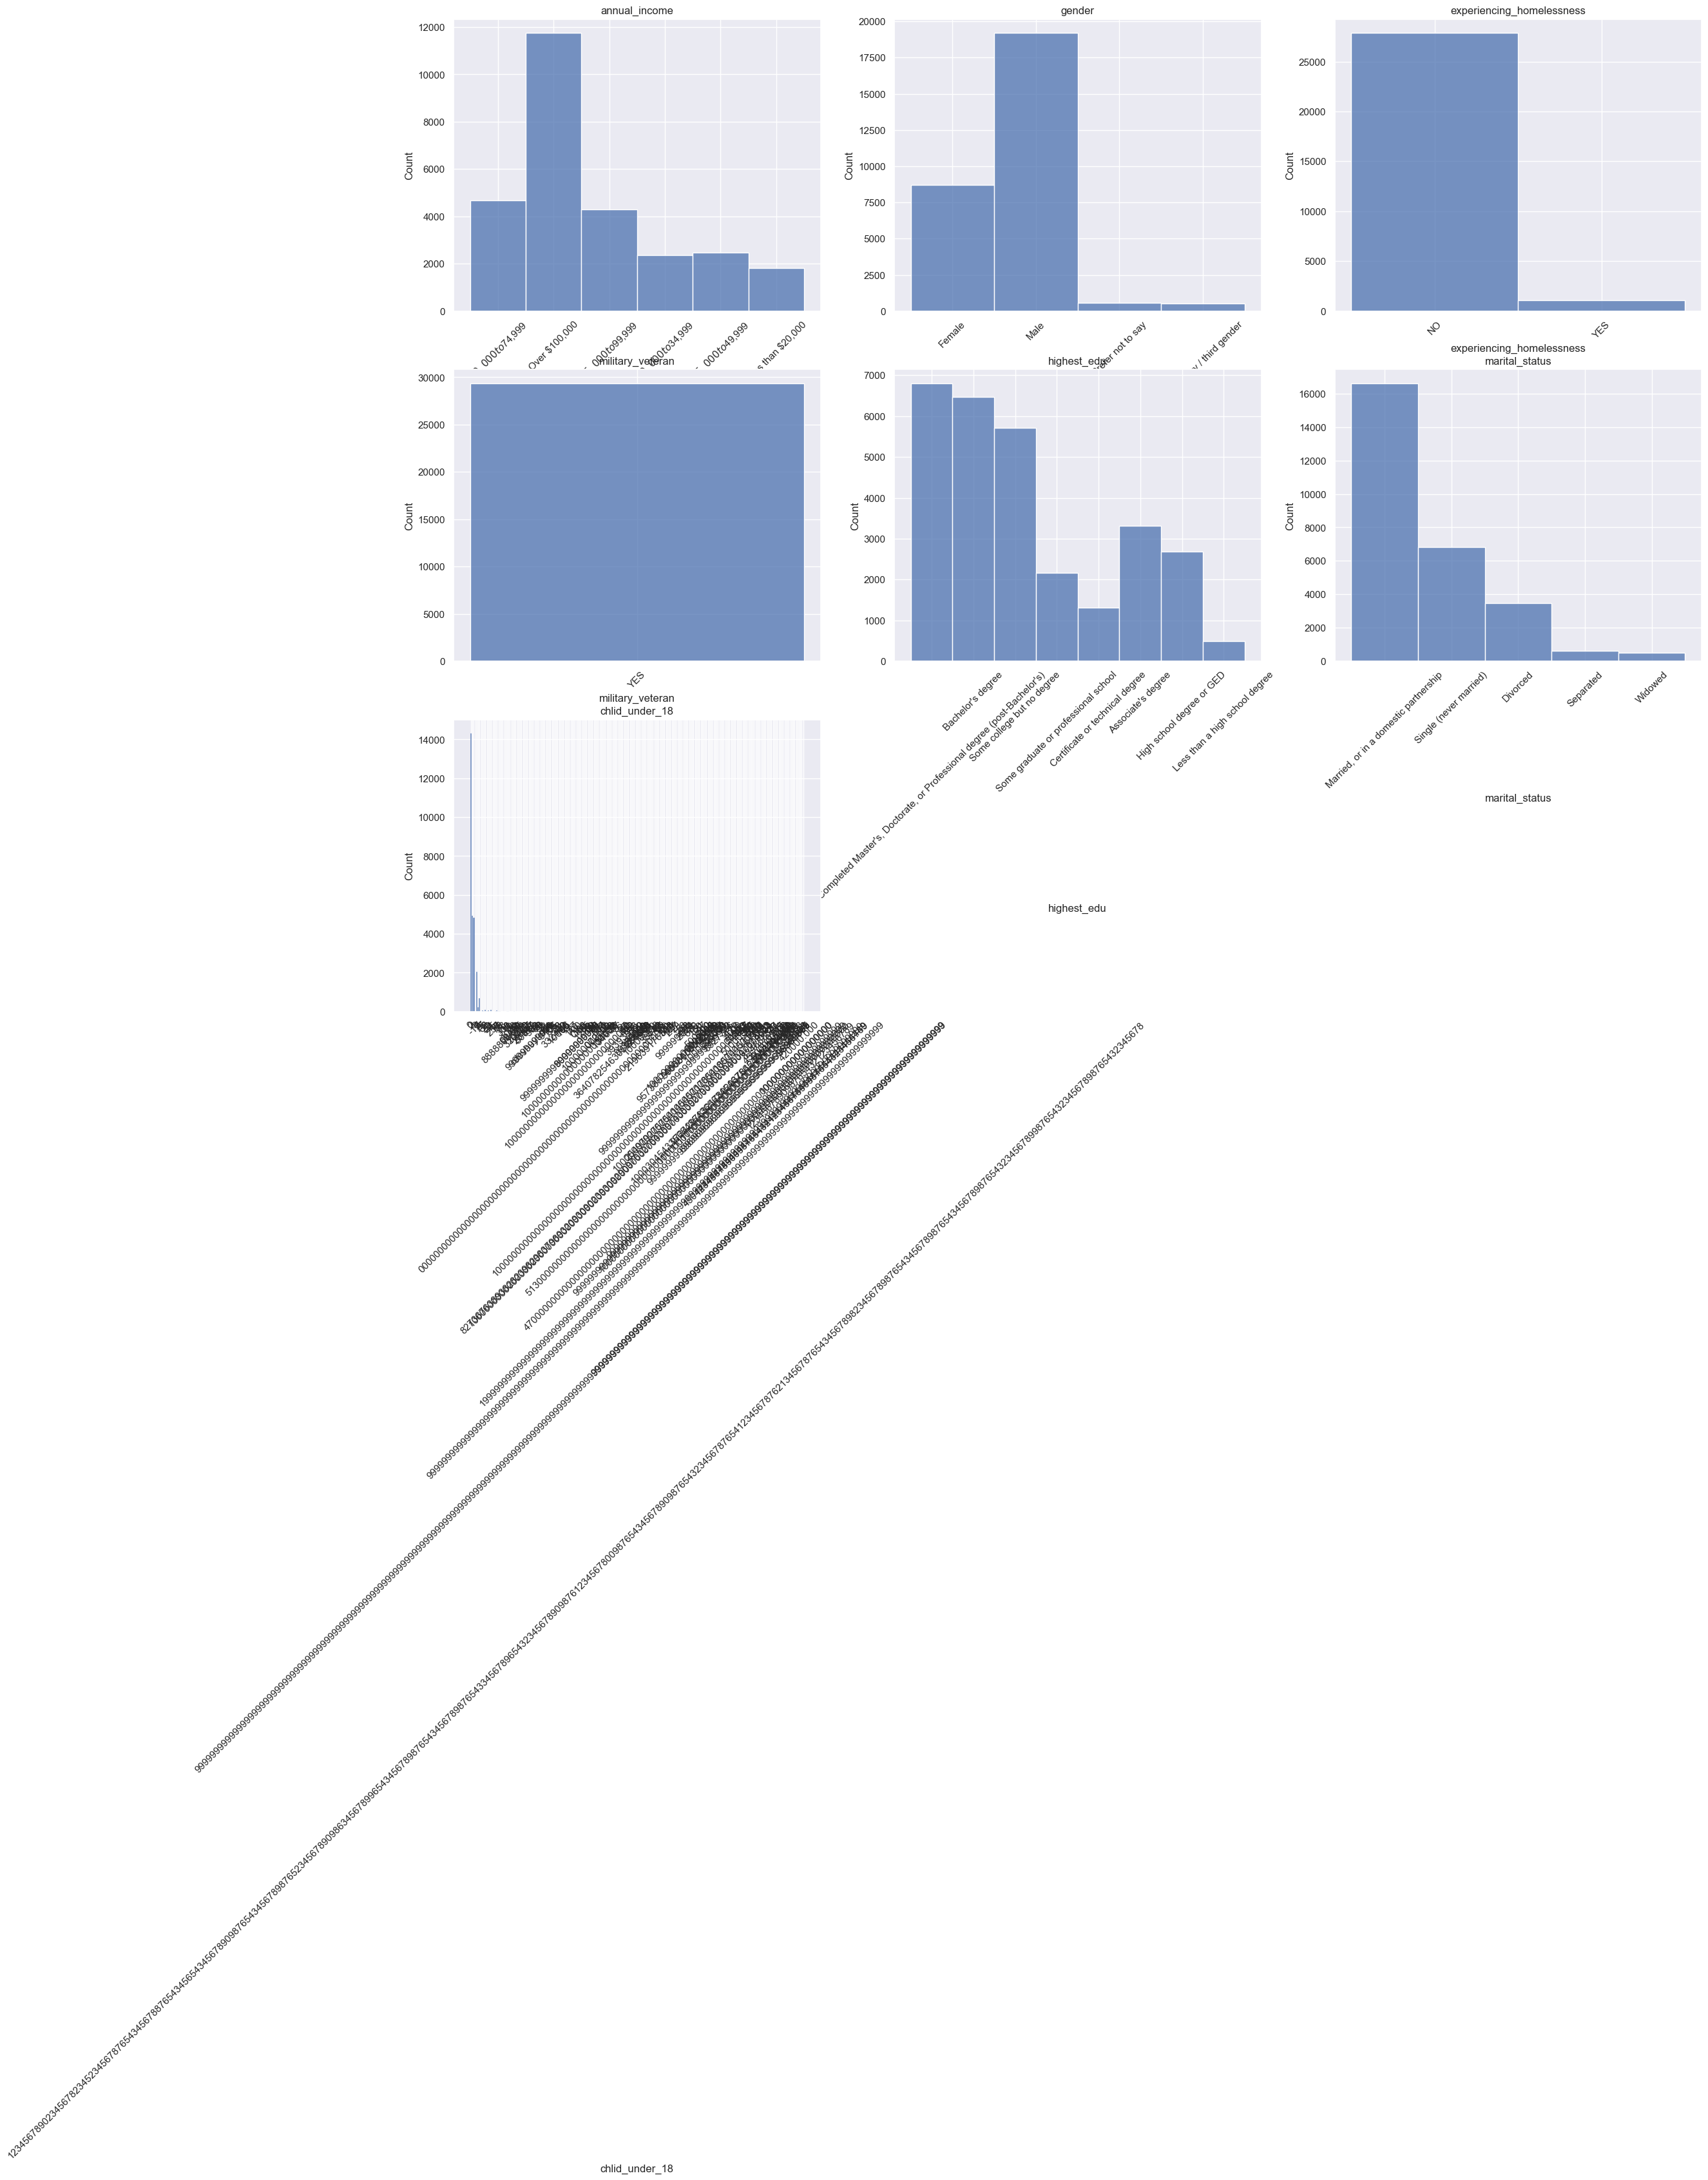

In [20]:
list_col=  ['annual_income', 'gender', 'experiencing_homelessness', 'military_veteran', 'highest_edu','marital_status', 'chlid_under_18']
plt.figure(figsize=(25, 20))
for i in range(len(list_col)):
    plt.subplot(3,3,i+1)
    plt.title(list_col[i])
    sns.histplot(data=df_veterans_categorical,x=df_veterans_categorical[list_col[i]])
    sns.set(font_scale=1)
    plt.xticks(rotation=45)
    
plt.tight_layout()
plt.show()

In [37]:
# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df_veterans_categorical["annual_income", "chlid_under_18"].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

KeyError: ('annual_income', 'chlid_under_18')

<Figure size 1000x600 with 0 Axes>

In [33]:
plt.figure(figsize=(5,3))
sns.heatmap(df_veterans_categorical.corr(),annot=True ,cmap="YlGn" )
plt.show()

C:\Users\Solayman\AppData\Local\Temp\ipykernel_36400\1595838772.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_veterans_categorical.corr(),annot=True ,cmap="YlGn" )


ValueError: zero-size array to reduction operation fmin which has no identity

<Figure size 500x300 with 0 Axes>

In [ ]:
df_num = df_veterans.select_dtypes(include = ['float64', 'int64'])
df_num.head()

# Reference

https://github.com/ResidentMario/missingno